# Изучение закономерностей, определяющих успешность игр

**Задача - выявить определяющие успешность игры закономерности в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).**

###  Откроем файл с данными и изучим общую информацию.

Описание данных:    

Name — название игры    
Platform — платформа    
Year_of_Release — год выпуска    
Genre — жанр игры    
NA_sales — продажи в Северной Америке (миллионы проданных копий)    
EU_sales — продажи в Европе (миллионы проданных копий)    
JP_sales — продажи в Японии (миллионы проданных копий)    
Other_sales — продажи в других странах (миллионы проданных копий)    
Critic_Score — оценка критиков (максимум 100)    
User_Score — оценка пользователей (максимум 10)    
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
# откроем файл
df = pd.read_csv(r'C:\Users\Юлия\Desktop\projects\games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [4]:
# переименуем названия колонок
df.columns= df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
# посмотрим общую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# посмотрим дубликаты
df.duplicated().sum()

0

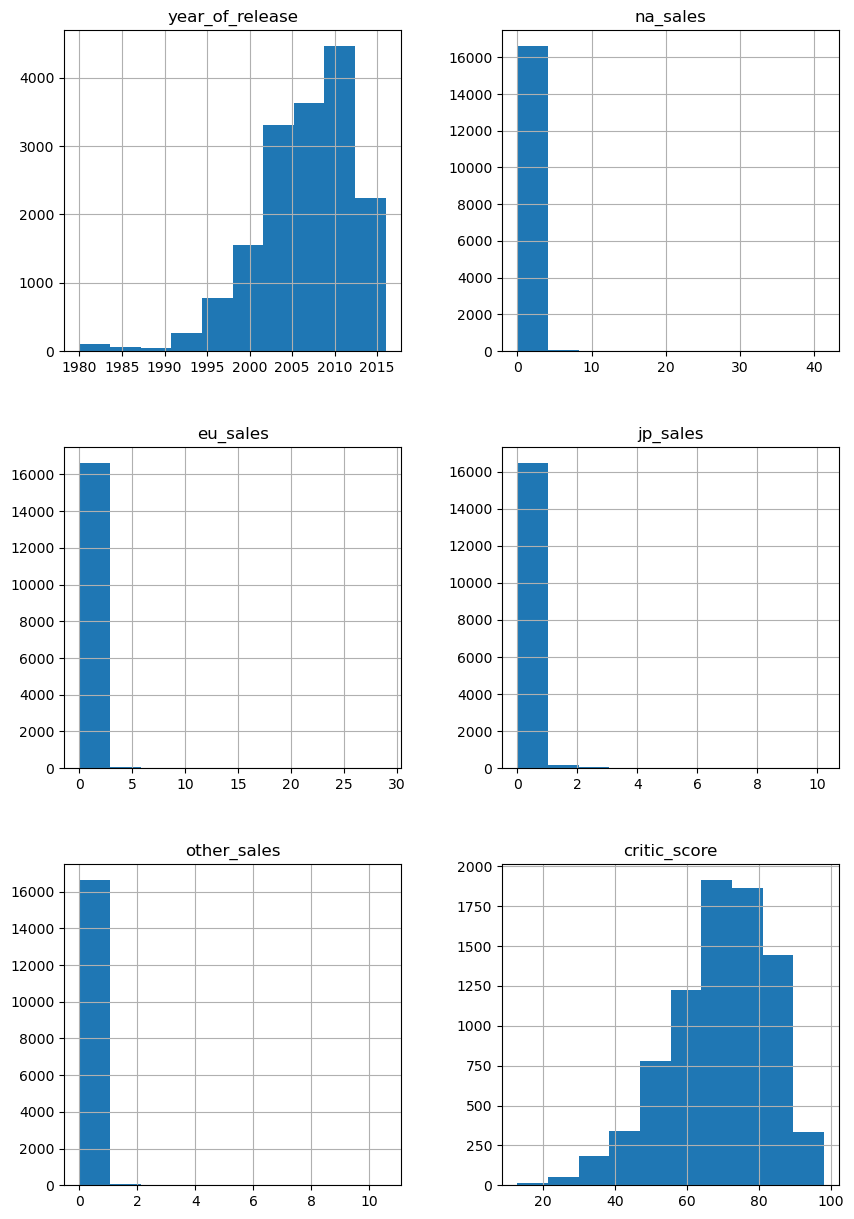

In [7]:
df.hist(figsize=(10, 15))
plt.show()

**В результате первичной оценки обнаружены некорректные типы данных, в следствие чего графики построились не по всем колонкам. Также обнаружены пропуски в некоторых столбцах.**

### Предобработка данных

In [8]:
#создадим новый датафрейм
df2 = df.copy()

#### Изменим типы данных

In [9]:
df2.year_of_release.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Так как в дальнейшем мы будем работать только с последними годами, пропуски следует удалить, т.к. их наличие будет искажать данные.

In [10]:
# посмотрим сколько пропусков
df2.year_of_release.isna().sum()

269

In [11]:
# удалим пропуски
df2 = df2.dropna(subset=['year_of_release'])

In [12]:
# изменим тип данных в year_of_release на целое число
df2['year_of_release'] = df2['year_of_release'].astype('int')
df2.year_of_release.unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

In [13]:
df2.user_score.sort_values(ascending=False).unique()

array(['tbd', '9.7', '9.6', '9.5', '9.4', '9.3', '9.2', '9.1', '9', '8.9',
       '8.8', '8.7', '8.6', '8.5', '8.4', '8.3', '8.2', '8.1', '8', '7.9',
       '7.8', '7.7', '7.6', '7.5', '7.4', '7.3', '7.2', '7.1', '7', '6.9',
       '6.8', '6.7', '6.6', '6.5', '6.4', '6.3', '6.2', '6.1', '6', '5.9',
       '5.8', '5.7', '5.6', '5.5', '5.4', '5.3', '5.2', '5.1', '5', '4.9',
       '4.8', '4.7', '4.6', '4.5', '4.4', '4.3', '4.2', '4.1', '4', '3.9',
       '3.8', '3.7', '3.6', '3.5', '3.4', '3.3', '3.2', '3.1', '3', '2.9',
       '2.8', '2.7', '2.6', '2.5', '2.4', '2.3', '2.2', '2.1', '2', '1.9',
       '1.8', '1.7', '1.6', '1.5', '1.4', '1.3', '1.2', '1.1', '1', '0.9',
       '0.7', '0.6', '0.5', '0.3', '0.2', '0', nan], dtype=object)

Чтобы изменить тип данных в оценке пользователей, необходимо заменить "tbd" на пропуски, т.к. tbd означает, что оценка будет определена позже.

In [14]:
# исправим значения и изменим тип данных
df2.loc[df2['user_score'] == 'tbd', 'user_score'] = float('nan')
df2['user_score'] = df2['user_score'].astype('float')
df2.user_score.sort_values(ascending=False).unique()

array([9.7, 9.6, 9.5, 9.4, 9.3, 9.2, 9.1, 9. , 8.9, 8.8, 8.7, 8.6, 8.5,
       8.4, 8.3, 8.2, 8.1, 8. , 7.9, 7.8, 7.7, 7.6, 7.5, 7.4, 7.3, 7.2,
       7.1, 7. , 6.9, 6.8, 6.7, 6.6, 6.5, 6.4, 6.3, 6.2, 6.1, 6. , 5.9,
       5.8, 5.7, 5.6, 5.5, 5.4, 5.3, 5.2, 5.1, 5. , 4.9, 4.8, 4.7, 4.6,
       4.5, 4.4, 4.3, 4.2, 4.1, 4. , 3.9, 3.8, 3.7, 3.6, 3.5, 3.4, 3.3,
       3.2, 3.1, 3. , 2.9, 2.8, 2.7, 2.6, 2.5, 2.4, 2.3, 2.2, 2.1, 2. ,
       1.9, 1.8, 1.7, 1.6, 1.5, 1.4, 1.3, 1.2, 1.1, 1. , 0.9, 0.7, 0.6,
       0.5, 0.3, 0.2, 0. , nan])

In [15]:
#округлим до 2 знаков после запятой
list_column = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

for column in list_column:
    if column in df2[column]:
        df2[column].round(2)
df2.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.9+ MB


#### Обработка пропусков

In [17]:
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пропуски' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось')

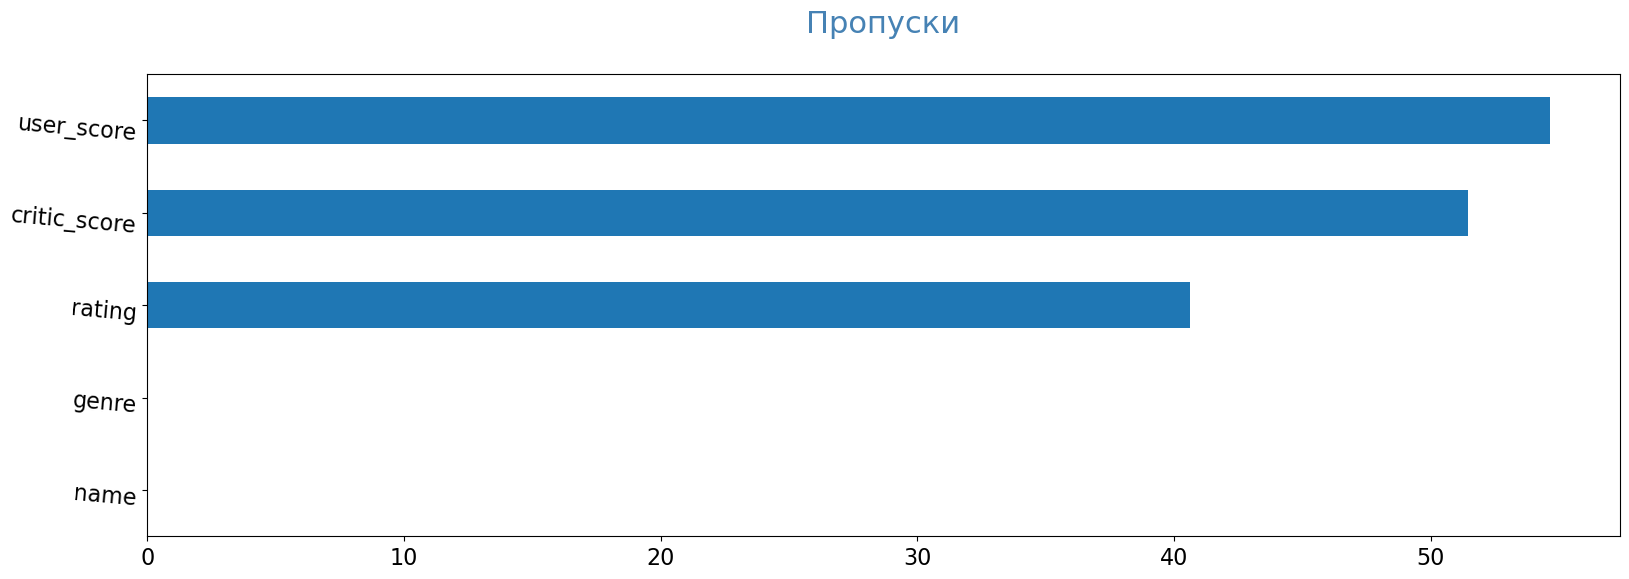

In [18]:
pass_value_barh(df2)

In [19]:
df2.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

##### Название игры

In [20]:
# удалим пропуски в названии игры, тк они незначительны
df2 = df2.dropna(subset=['name'])
df2.name.isna().sum()

0

##### Жанр

In [21]:
# проверим пропуски в жанрах в соответствии с платформой
df2[df2['genre'].isna()]['platform'].value_counts().sort_values(ascending=False)

Series([], Name: platform, dtype: int64)

In [22]:
# проверим теорию, что данная платформа выпускает игры одного жанра
df2[df2['platform'] == 'GEN']['genre'].unique()

array(['Platform', 'Fighting', 'Action', 'Sports', 'Racing', 'Strategy',
       'Role-Playing', 'Shooter', 'Adventure', 'Misc'], dtype=object)

In [23]:
# тк теория не подтвердилась, удалим пропуски в жанре на неизвестный
df2 = df2.dropna(subset=['genre'])
display(df2.name.isna().sum())
df2.genre.unique()

0

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

##### Рейтинг

In [24]:
# посмотрим уникальные значения рейтинга
df2.rating.sort_values(ascending=False).unique()

array(['T', 'RP', 'M', 'K-A', 'EC', 'E10+', 'E', 'AO', nan], dtype=object)

In [25]:
# посмотрим на частоту значений
df2.rating.value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [26]:
# удалим редкие значения, тк они не повлияют на дальнейшее исследование
df2 = df2.query('rating != "EC" and rating != "RP" and rating != "AO"')
df2.rating.sort_values(ascending=False).unique()

array(['T', 'M', 'K-A', 'E10+', 'E', nan], dtype=object)

In [27]:
# заменим рeйтинг 'K-A' на 'E', тк 'K-A' старое обозначение рейтинга 'E', пропуски заменим на неизвестный
df2.loc[df2['rating'] == 'K-A', 'rating'] = 'E'
df2['rating'] = df2['rating'].fillna('unknown')
display(df2.rating.isna().sum())
df2.rating.sort_values(ascending=False).unique()

0

array(['unknown', 'T', 'M', 'E10+', 'E'], dtype=object)

##### Оценки критиков и пользователей

Проверим теорию, что раннее критики и пользователи оценивали фильмы меньше. Построим графики для наглядности, чтобы определить примерно контрольную точку, когда пользователи стали оценивать фильмы

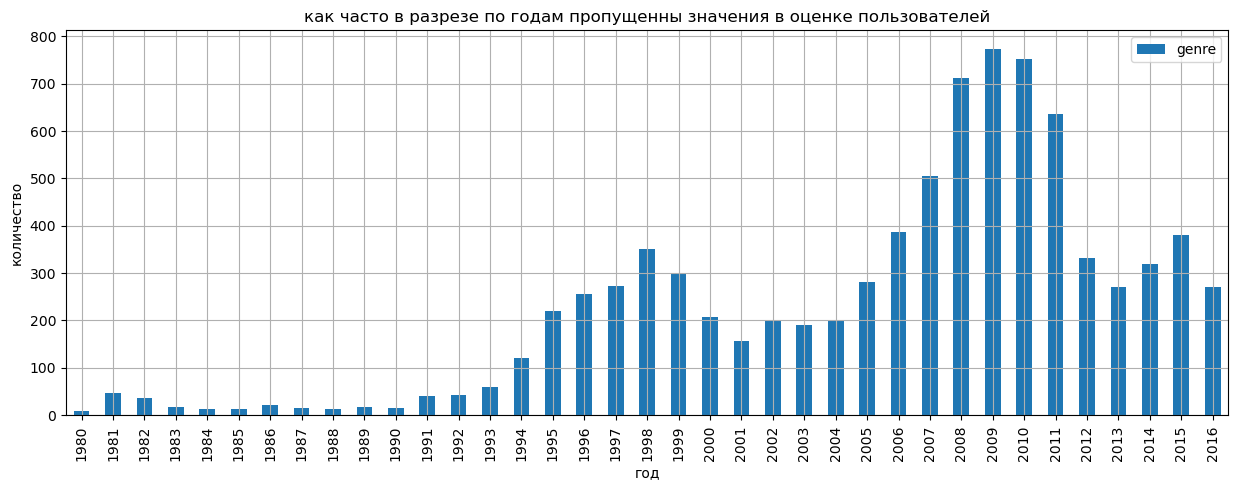

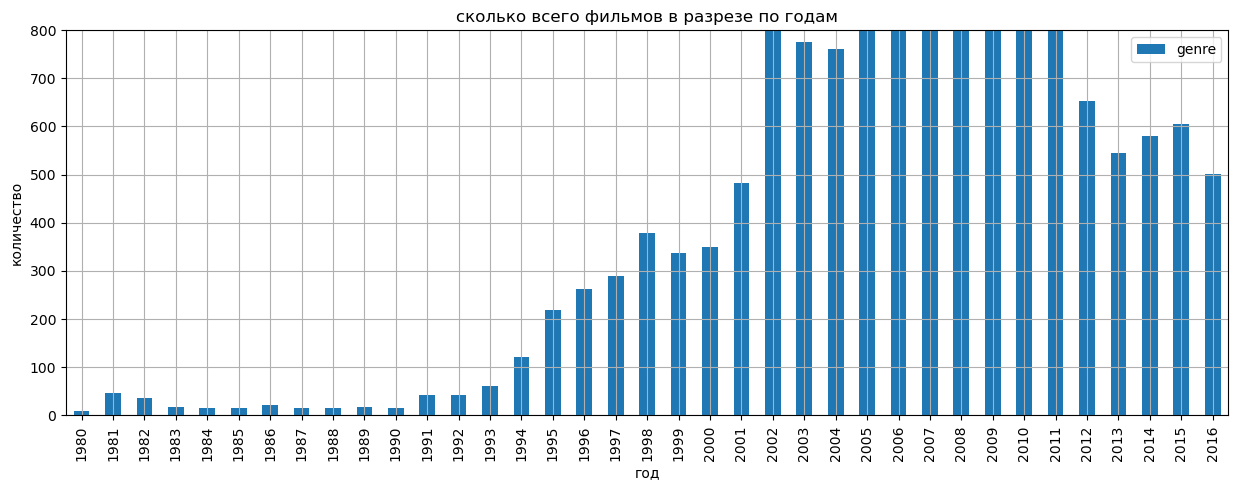

In [28]:
# отобразим на графиках данные (для оси у выберем столбец без пропусков)

(
    df2[df2['critic_score'].isna()]
    .pivot_table(index = 'year_of_release',  aggfunc = 'count')
    .reset_index()
    .plot(x='year_of_release', y='genre',kind='bar',style='o-', \
          title='как часто в разрезе по годам пропущенны значения в оценке пользователей', \
          figsize = (15,5), grid=True, xlabel='год', ylabel='количество')
)
# отобразим на графиках данные 
plt.show()
(
    df2
    .pivot_table(index = 'year_of_release',  aggfunc = 'count')
    .reset_index()
    .plot(x='year_of_release', y='genre', kind='bar',style='o-', \
          title='сколько всего фильмов в разрезе по годам', \
          figsize = (15,5), grid=True, xlabel='год', ylabel='количество')
    .set_ylim(0, 800)
)
plt.show()

Из графиков видно, что сильно изменение по оцениванке критиками игр происходит с 2000 года. До 2000 года практически все игры в данных не были оценены.

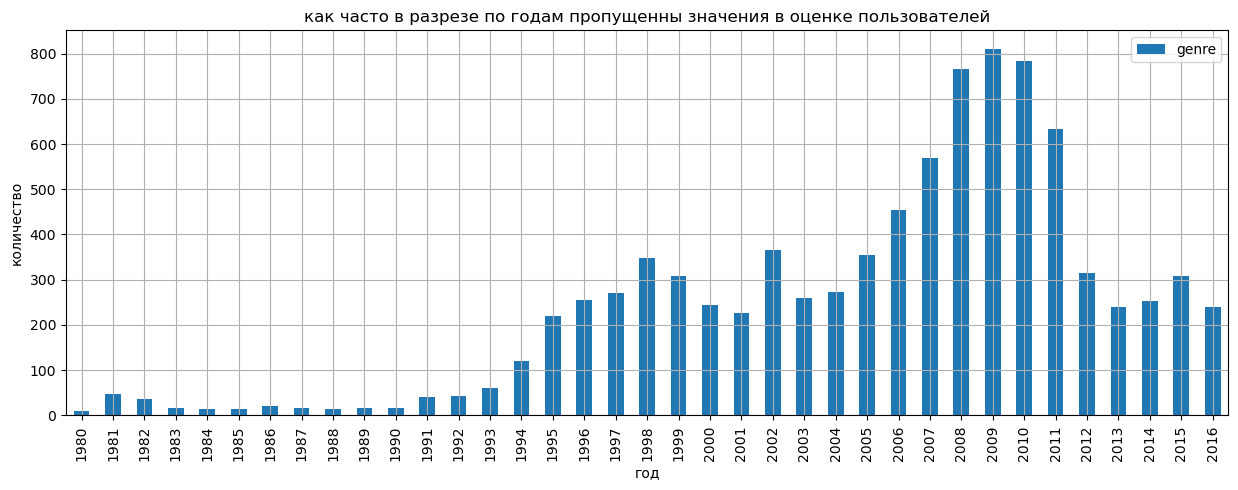

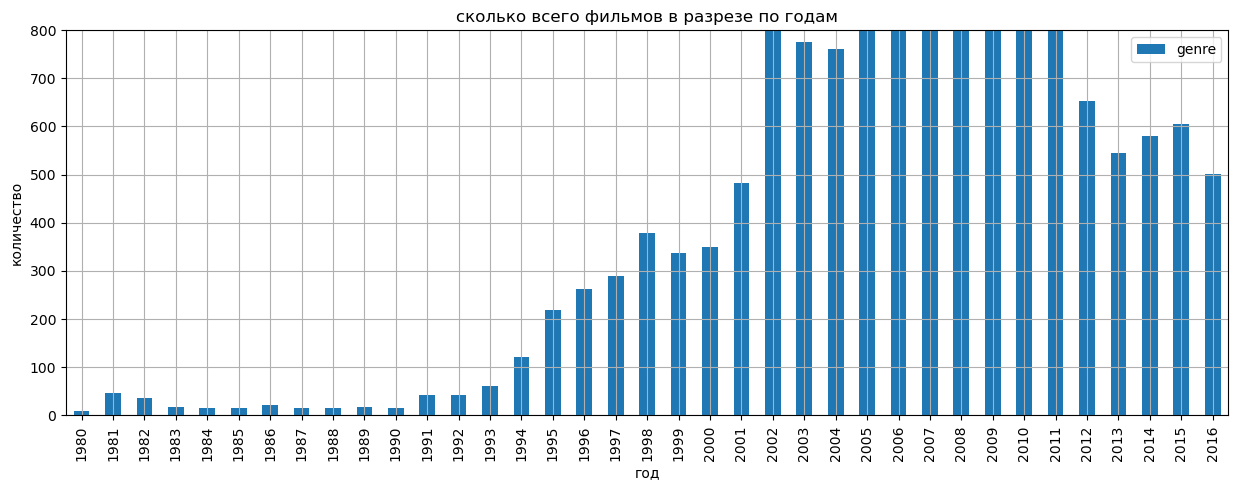

In [29]:
# отобразим на графиках данные (для оси у выберем столбец без пропусков)

(
    df2[df2['user_score'].isna()]
    .pivot_table(index = 'year_of_release',  aggfunc = 'count')
    .reset_index()
    .plot(x='year_of_release', y='genre', kind='bar',style='o-', \
          title='как часто в разрезе по годам пропущенны значения в оценке пользователей', \
          figsize = (15,5), grid=True, xlabel='год', ylabel='количество')
)
plt.show()
(
    df2
    .pivot_table(index = 'year_of_release',  aggfunc = 'count')
    .reset_index()
    .plot(x='year_of_release', y='genre', kind='bar',style='o-', \
          title='сколько всего фильмов в разрезе по годам', \
          figsize = (15,5), grid=True, xlabel='год', ylabel='количество')
    .set_ylim(0, 800)
)
plt.show()

Аналогичная ситуация и с оценкой игр пользователями. С 2000 года % оценивания гораздо выше. Проверим зависимость оценок критиков и пользователей от жанра игры. Предполагаю, что наличие пропусков в оценке критиков и пользователей объясняется тем, что раньше было менее распросранено выбирать игры по рейтингу, в силу отсутствия интернета у большинства пользователей. В седствие чего рейтинг не был нужен для продажи и покупки игр.

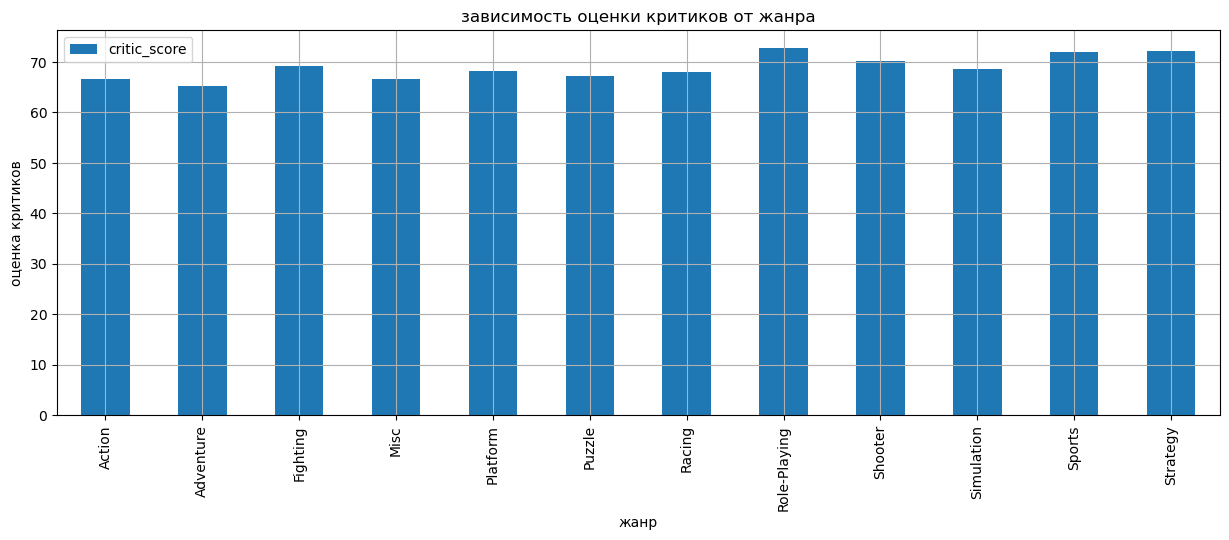

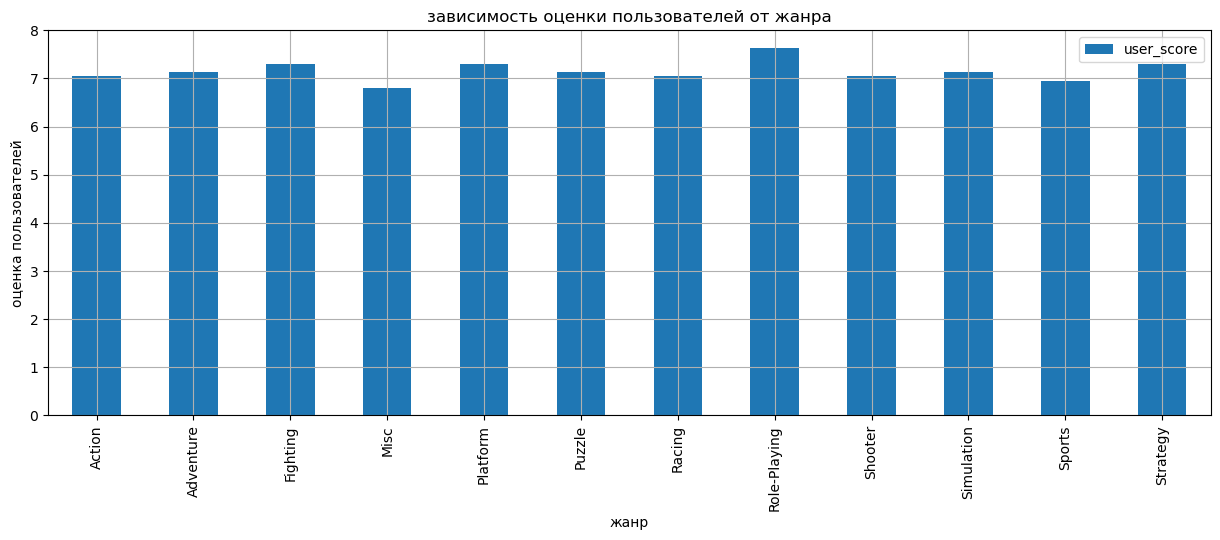

In [30]:
# проверим зависимость оценки критиков от жанра
(
    df2.pivot_table(index='genre',values='critic_score', aggfunc='mean')
    .reset_index()
    .plot(kind='bar', x='genre', y='critic_score', style='o-', title='зависимость оценки критиков от жанра', \
          xlabel='жанр', ylabel='оценка критиков', figsize = (15,5), grid=True)
)
plt.show()
# проверим зависимость оценки пользователей от жанра
(
    df2.pivot_table(index='genre',values='user_score', aggfunc='mean')
    .reset_index()
    .plot(kind='bar', x='genre', y='user_score', style='o-', title='зависимость оценки пользователей от жанра', \
          xlabel='жанр', ylabel='оценка пользователей', figsize = (15,5), grid=True)
)
plt.show()

Как можно наблюдать из графиков, оценки критиков и пользователей не сильно зависят от жанра игры, скорее это критерий, который индивидуален для каждой игры. Также предполагаю, что популярность жанров отличается в разные годы. Пропуски в данных заполним значением "заглушкой", тк их заполнение каким-либо другим значением может сместить дальнейшую оценку.

In [31]:
df2['critic_score'] = df2['critic_score'].fillna(-1)
df2['user_score'] = df2['user_score'].fillna(-1)

In [32]:
# проверим оставшиеся пропуски
display(df2.critic_score.isna().sum())
df2.user_score.isna().sum()

0

0

пропусков не осталось


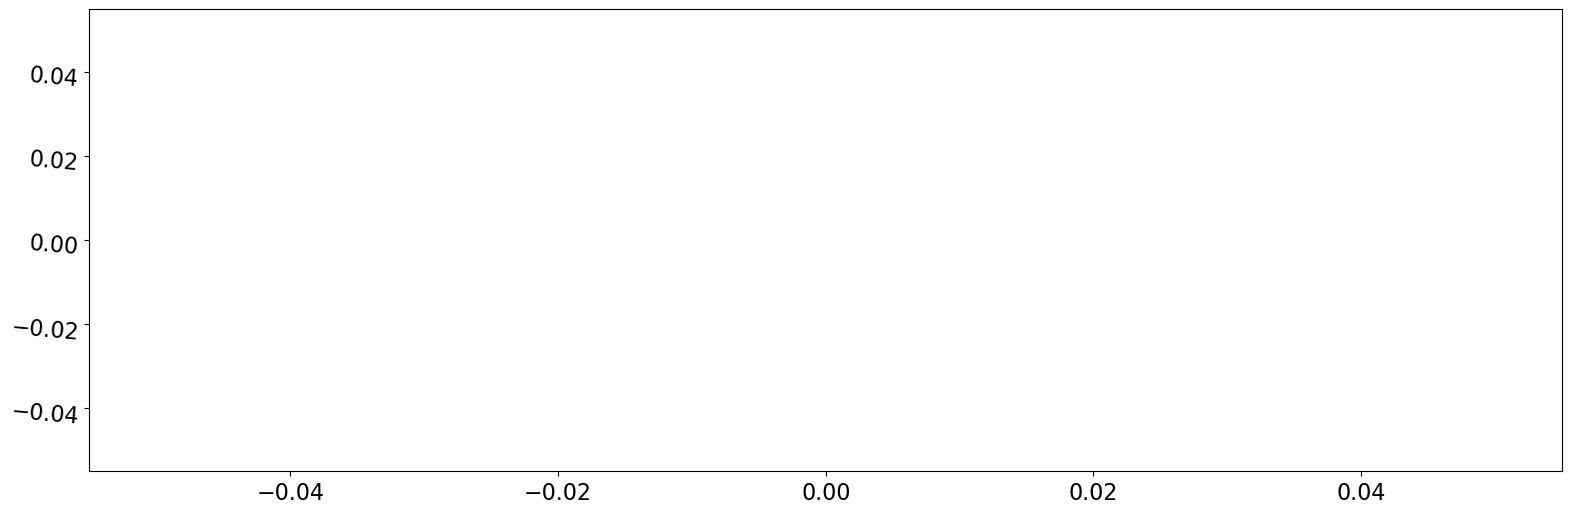

In [33]:
pass_value_barh(df2)

#### Посчитаем суммарные продажи во всех регионах

In [34]:
df2['sales_sum'] = df2[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df2.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24


#### Обработка аномальных значений

In [35]:
df2.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'sales_sum'],
      dtype='object')

In [36]:
# кол-во продаж и оценок в датасете, минимальные и максимальные значения
(
    df2[['na_sales', 'eu_sales','jp_sales', 'other_sales', 'critic_score', 'user_score']]
    .query('critic_score>=0 and user_score>=0')
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,"6,892.00","6,892.00","6,892.00","6,892.00","6,892.00","6,892.00"
min,0.00,0.00,0.00,0.00,13.00,0.50
max,41.36,28.96,6.50,10.57,98.00,9.60


In [37]:
# значения параметров на разных квантилях
(
    df2[['na_sales', 'eu_sales','jp_sales', 'other_sales', 'critic_score', 'user_score']]
    .query('critic_score>=0 and user_score>=0')
    .quantile([0.01, .5, .90, .9976])  
    .style.format("{:,.2f}")
)

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
0.010000,0.00,0.00,0.00,0.00,31.91,2.50
0.500000,0.15,0.06,0.00,0.02,72.00,7.50
0.900000,0.90,0.53,0.13,0.18,86.00,8.70
0.997600,8.10,5.73,2.85,1.95,96.00,9.35


Аномальные выбросы в данных по продажам стоит оставить для дальнейшего исследования, т.к. они могут говорить о успешных продажах игр в конкретный год, на определенной платформе и т.д.

**В результате предобработки данных были обработаны пропуски, изменены типы данных, изучены аномальные значения и посчитаны суммарные продажи во всех регионах.**

### Исследовательский анализ данных

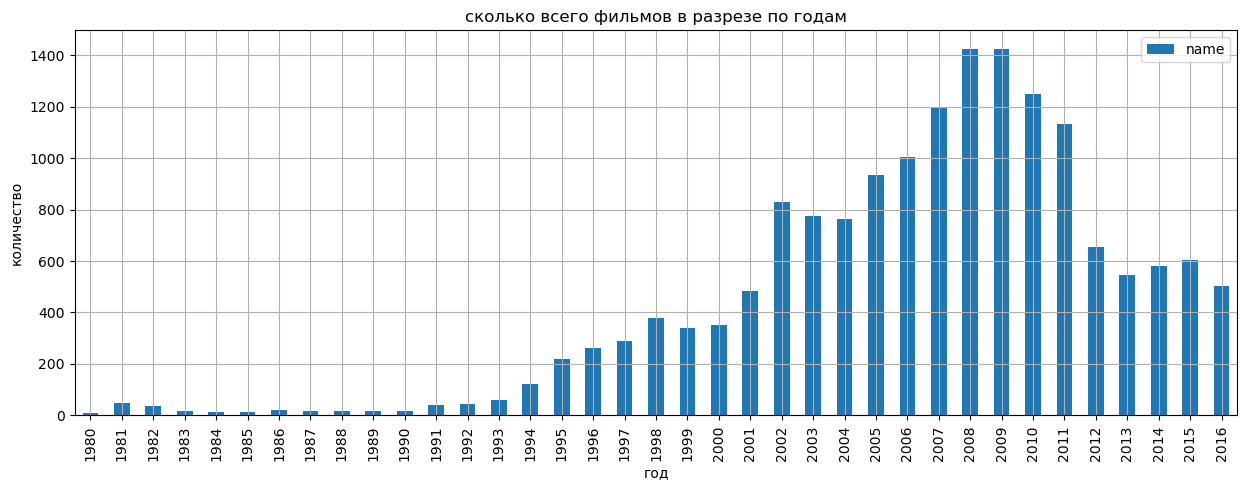

In [38]:
# посмотрим сколько всего игр выпускалось в разные годы
(
    df2
    .pivot_table(index = 'year_of_release',  aggfunc = 'count')
    .reset_index()
    .plot(x='year_of_release', y='name', kind='bar',style='o-', \
          title='сколько всего фильмов в разрезе по годам', \
          figsize = (15,5), grid=True, xlabel='год', ylabel='количество')
)
plt.show()

Из графика видно, что до 1994 года игр практически не было. Затем индустрия развивается, идет плавный подъем и резкий скачок можно видеть в 2002 году. Пик приходится на 2008 и 2009 года. После чего количество выпускаемых игр начинает снижаться и остается на одном уровне с 2012 года, что можно объяснить развитием игр на мобильных устройствах и игровых приставок.    
Самый стабильный период 2012-2016 года.

'Список платформ с наибольшими продажами'

,platform,sum
0,PS2,1233.32
1,X360,961.24
2,PS3,931.34
3,Wii,890.52
4,DS,802.13
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


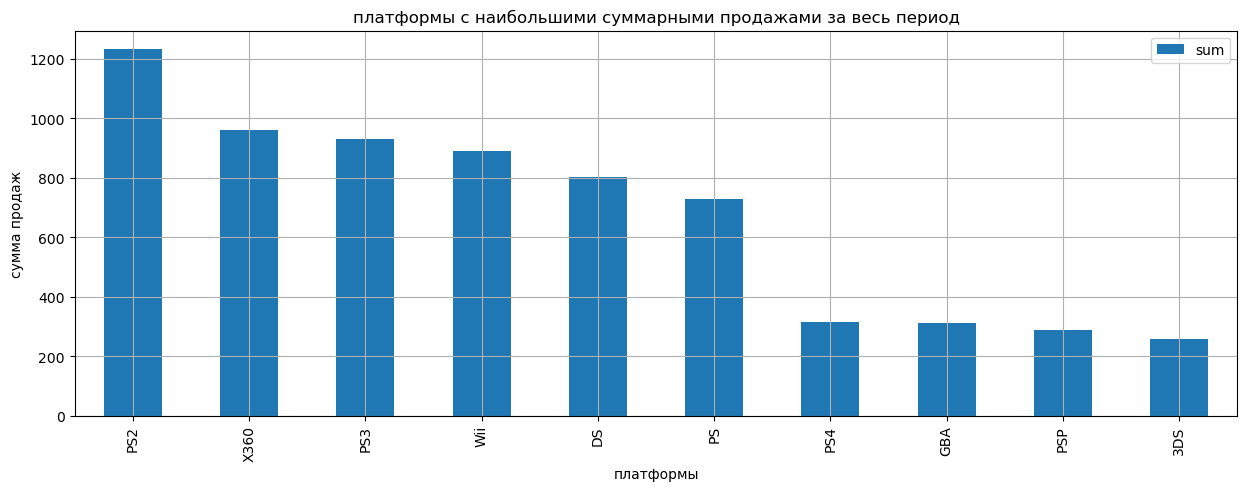

In [39]:
# выберем платформы с наибольшими суммарными продажами
platform_pivot = df2.pivot_table(index = 'platform', values = 'sales_sum', aggfunc='sum')
platform_pivot.columns = ['sum']
platform_pivot = platform_pivot.sort_values('sum', ascending = False).reset_index().round(2).head(10)
display('Список платформ с наибольшими продажами', platform_pivot)
platform_pivot.plot(x='platform', y='sum', kind='bar',style='o-', \
          title='платформы с наибольшими суммарными продажами за весь период', \
          figsize = (15,5), grid=True, xlabel='платформы', ylabel='сумма продаж')
# поместим названия платформ в список
list_pl = platform_pivot['platform'].tolist()


Выявили лидирующие платформы по продажам за весь период - PS2, X360, PS, Wii, DS, PS	

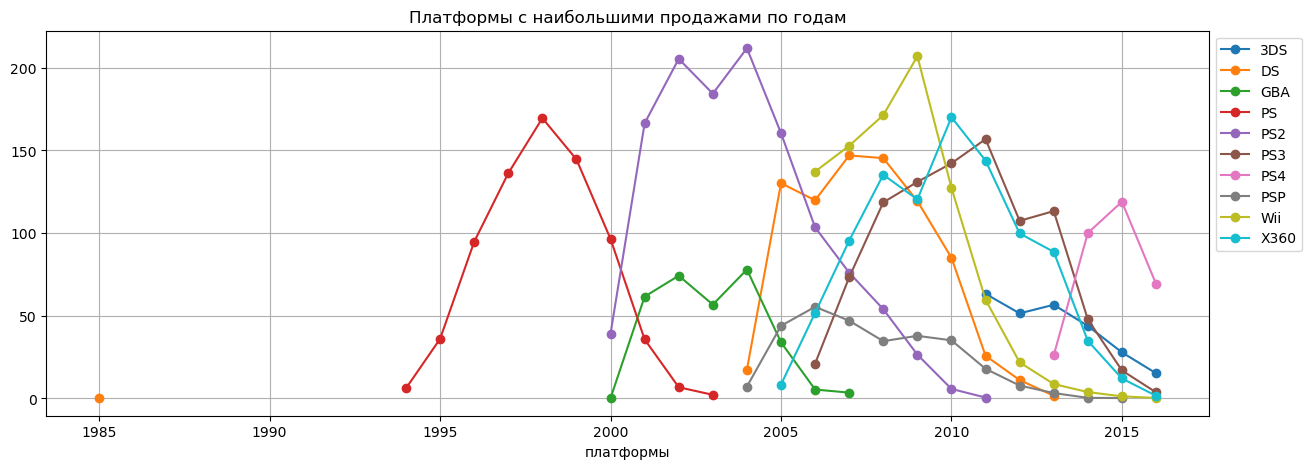

In [40]:
# построим график, учитывая платформы с наибольшими продажами по всем годам
(
    df2.query('platform == @list_pl')
    .pivot_table(index = 'year_of_release', columns = 'platform', values = 'sales_sum', aggfunc = 'sum')
    .plot(style='o-', title='Платформы с наибольшими продажами по годам', figsize = (15,5), grid=True, xlabel='платформы')
    .legend(bbox_to_anchor=(1, 1))
)
plt.show()

Можно увидеть зарождающиеся и ранее популярные платформы, которые идут на спад.

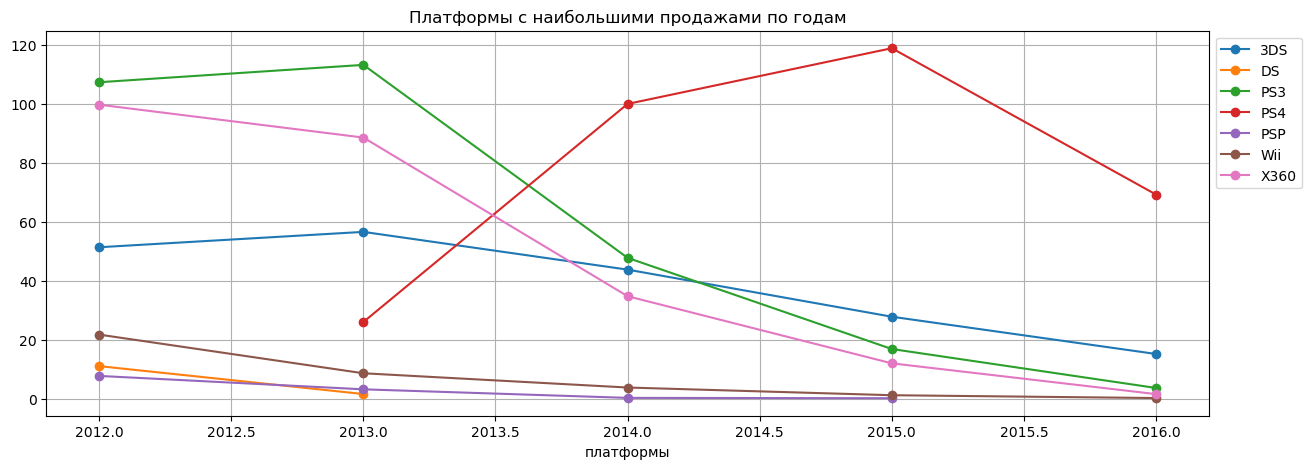

In [41]:
# построим график, учитывая платформы с наибольшими продажами за весь период и отфильтруем последние года
(
    df2.query('platform == @list_pl')
    .query('year_of_release > 2011')
    .pivot_table(index = 'year_of_release', columns = 'platform', values = 'sales_sum', aggfunc = 'sum')
    .plot(style='o-', title='Платформы с наибольшими продажами по годам', figsize = (15,5), grid=True, xlabel='платформы')
    .legend(bbox_to_anchor=(1, 1))
)
plt.show()

На графике мы можем видеть как ранее популярные платформы теряют в продажах. Из топ платформ по продажам за весь период лидирует только PS4. Это говорит о том, что многие платформы устаревают, и в каждый отрезок времени могут быть популярны разные платформы. Необходимо рассмотреть данные за актуальный период. Небольшой спад в 2016 году учитывать не стоит, т.к. год неполный.

In [42]:
# посмотим сколько лет в среднем существуют платфоры
round(df2.groupby('platform')['year_of_release'].nunique().mean(), 1)

7.7

В среднем платформы существуют чуть больше 7 лет.

Следует отбросить старые отжившие тренды и не учитывать пиковые значения прошлых лет, так как эти данные в большей части соответсвуют платформам, не работающим к текущему моменту, а также могут значительно исказить оценку новых зарождающих трендов. Создадим новый датафрейм, учитывающий только последние годы, не включающий в себя старую информацию и аномально большие значения. 2016 год будем учитывать, хоть он и не полный, тк в этом году самые актуальные данные и исследование в декабре месяце, следовательно на данные можно ориентироваться. Это поможет сделать более актуальный и достоверный прогноз на 2017 год.

In [43]:
# создадим новый датафрейм учитывающий только последние годы
df2_actual = df2.copy()
df2_actual = df2_actual.query('year_of_release > 2011')
df2_actual.info()
df2_actual.year_of_release.unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   int32  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     2886 non-null   float64
 9   user_score       2886 non-null   float64
 10  rating           2886 non-null   object 
 11  sales_sum        2886 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 281.8+ KB


array([2013, 2015, 2012, 2014, 2016])

'Список платформ с наибольшими продажами'

,platform,sum
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


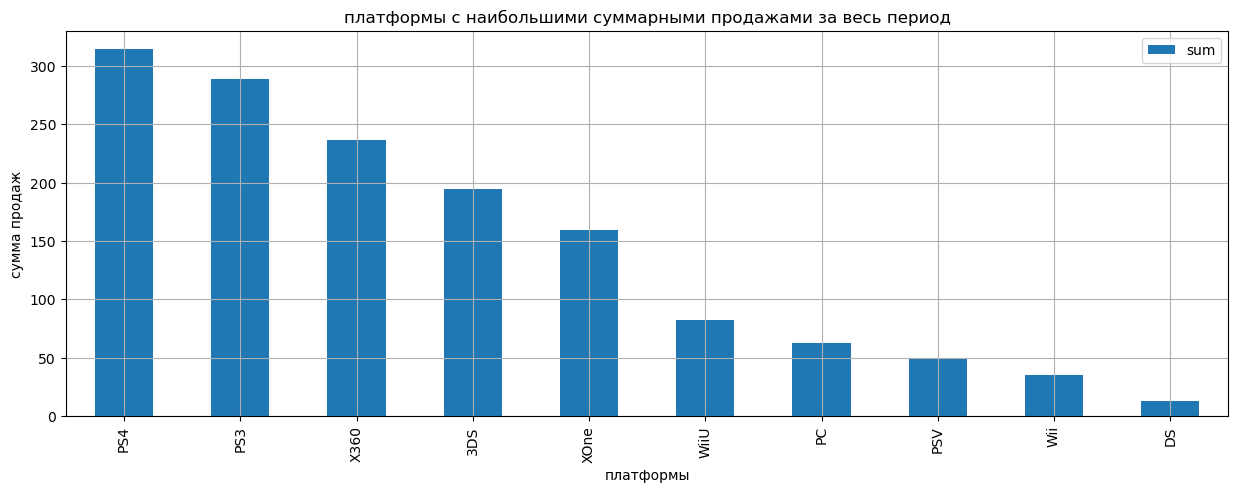

In [44]:
# выберем платформы с наибольшими суммарными продажами
platform_top = df2_actual.pivot_table(index = 'platform', values = 'sales_sum', aggfunc='sum')
platform_top.columns = ['sum']
platform_top = platform_top.sort_values('sum', ascending = False).reset_index().round(2).head(10)
display('Список платформ с наибольшими продажами', platform_top)
platform_top.plot(x='platform', y='sum', kind='bar',style='o-', \
          title='платформы с наибольшими суммарными продажами за весь период', \
          figsize = (15,5), grid=True, xlabel='платформы', ylabel='сумма продаж')
list_pl_t = platform_top['platform'].tolist()
list_pl_top = [x for x in list_pl_t if (x!= "PS3") & (x!= "X360")]

Выделим 5 самых прибыльных платформ за последние 5 лет - PS4, PS3, X360, 3DS, XOne. Выберем именно 5 первых, т.к. начиная с 6 платформы WiiU идет сильное снижение в продажах.

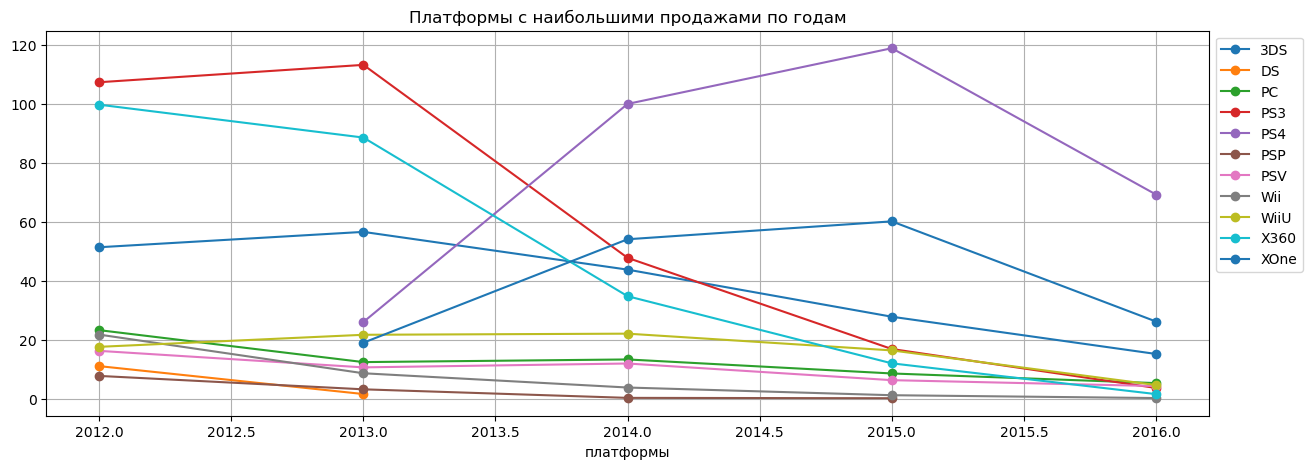

In [45]:
# построим график по актуальным данным в разрезе всех платформ
(
    df2_actual
    .pivot_table(index = 'year_of_release', columns = 'platform', values = 'sales_sum', aggfunc = 'sum')
    .plot(style='o-', title='Платформы с наибольшими продажами по годам', figsize = (15,5), grid=True, xlabel='платформы')
    .legend(bbox_to_anchor=(1, 1))
)
plt.show()

На графике можно наблюдать, что актуальные платформы по объему продаж сформировались с 2014 года.

In [46]:
# поместим названия платформ в список
list_pl_top_5 = ['PS4', 'PS3', 'X360', '3DS', 'XOne']
list_pl_top_5

['PS4', 'PS3', 'X360', '3DS', 'XOne']

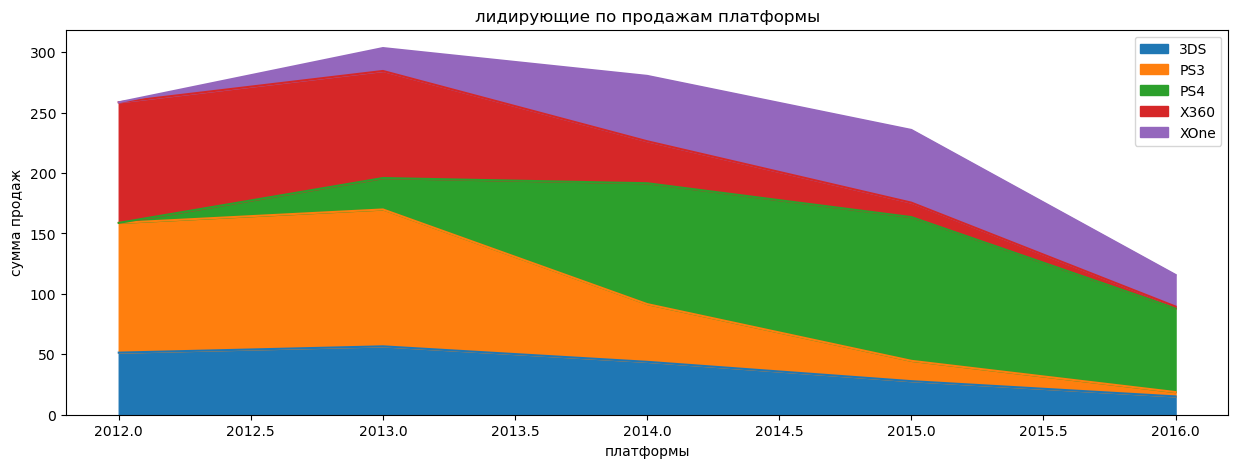

In [47]:
# посмотрим динамику продаж более наглядно
(
    df2_actual.query('platform == @list_pl_top_5')
    .pivot_table(index = 'year_of_release',  columns = 'platform', values = 'sales_sum', aggfunc = 'sum')
    .plot.area(title='лидирующие по продажам платформы', figsize = (15,5), xlabel='платформы', ylabel='сумма продаж')
    .legend(bbox_to_anchor=(1, 1))
)
plt.show()

Видим, что наращивают объемы продаж начиная с 2013 года платформы - PS4 и XOne. Платформа 3DS имеет небольшой спад. PS3 и X360 с 2013 года несут значительные потери в продажах игр, это связано с тем что PS4 и XOne являются продолжениями PS3 и X360.

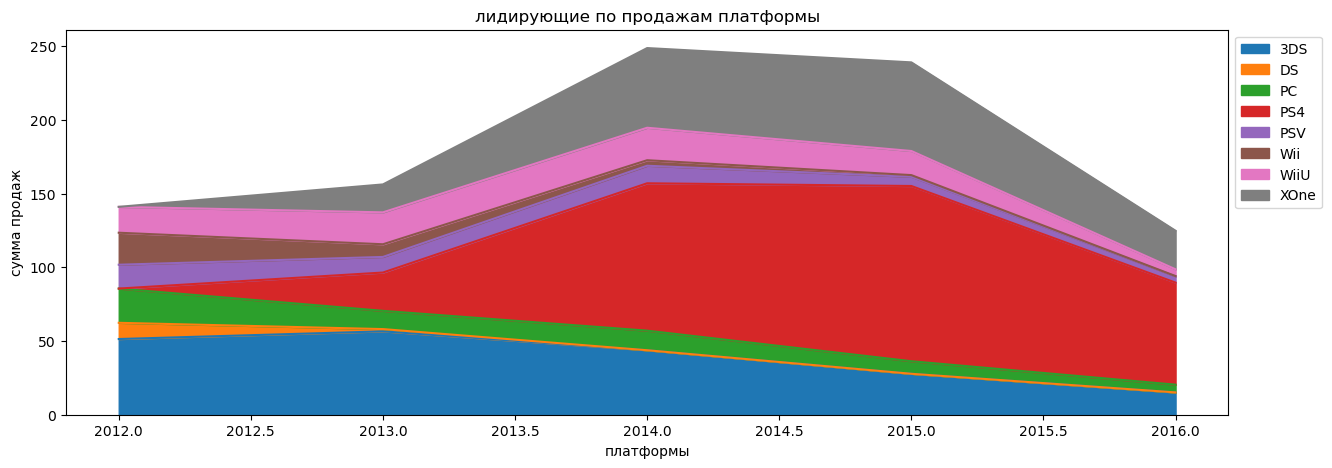

In [48]:
# посмотрим динамику продаж по самым прибыльным платформам, исключая PS3 и X360, тк они только будут терять в продажах
(
    df2_actual.query('platform == @list_pl_top')
    .pivot_table(index = 'year_of_release',  columns = 'platform', values = 'sales_sum', aggfunc = 'sum')
    .plot.area(title='лидирующие по продажам платформы', figsize = (15,5), xlabel='платформы', ylabel='сумма продаж')
    .legend(bbox_to_anchor=(1, 1))
)
plt.show()

Из данного исследования можно сделать следующие выводы:
- самая прибыльная платформа PS4
- PS3 и X360 являются прошлыми версиями PS4 и XOne и будут только терять объемы продаж со временем
- только PS4 и XOne наращивают продажи со временем
- платформа 3DS имеет неплохой % продаж относительно остальных платформ, но с годами объем падает
- платформа WiiU относительно стабильна в объемах продаж и находится на 4 месте, при исключении PS3 и X360, также она является приемницей платформы Wii
- замыкает рейтинг PC, которая занимает небольшую долю рынка относительно лидеров, но не сильно теряет в объеме продаж со временем.    

Судя по графику можно выделить следующие перспективные платформы PS4, XOne, 3DS, WiiU, PC

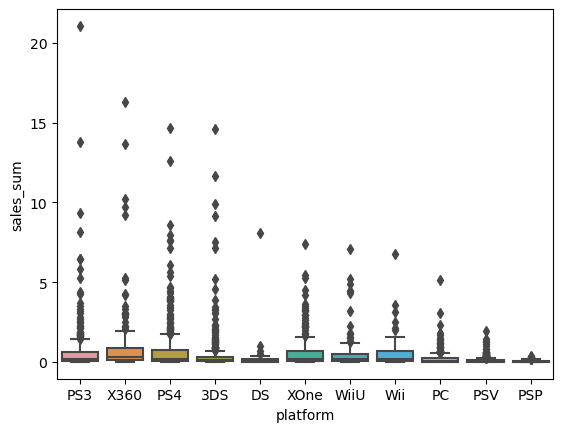

In [49]:
# построим график по глобальным продажам игр в разбивке по платформам
sns.boxplot(data=df2_actual, x='platform', y='sales_sum')
plt.show()

На графике мы видим не актуальную картину, тк с 2014 года "расстановка сил" изменилась. Необходимо построить график за актуальный период.

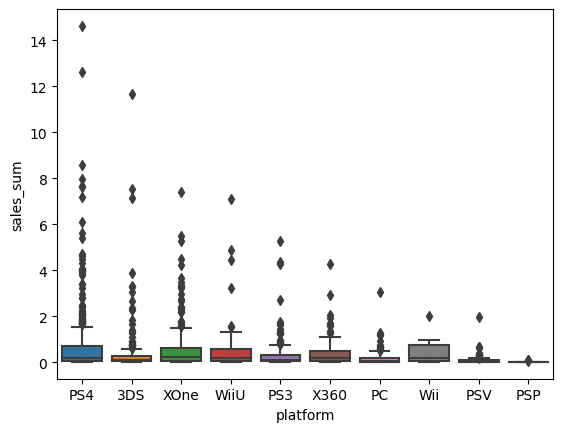

In [50]:
# создадим новый датафрейм с периодом от 2014 года (далее будем использовать в анализе его)
# построим график по глобальным продажам игр в разбивке по платформам
df2_actual2 = df2_actual.query("year_of_release >= 2014")
sns.boxplot(data=df2_actual2, x='platform', y='sales_sum')
plt.show()

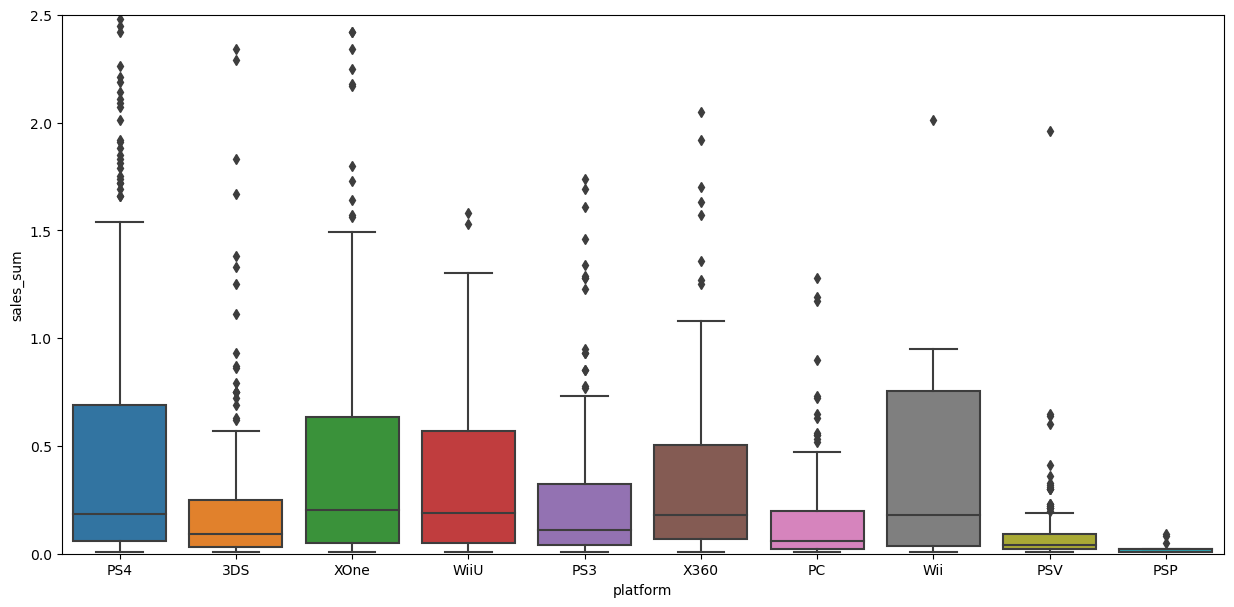

In [51]:
# посмотри ближе
df2_actual2 = df2_actual.query("year_of_release >= 2014")
plt.figure(figsize=(15, 7))
sns.boxplot(data=df2_actual2, x='platform', y='sales_sum')
plt.ylim(0,2.5)
plt.show()

Топ по продажам ранее: PS4, XOne, 3DS, WiiU, PC.    
Первые 2 лидера PS4 и XOne остаются на своих позициях. PS4 опережает XOne за счет аномально больших редких продаж, что может быть связано с дороговизной или популярностью конкретных игр на платформе. 
PS3 и Х360 отстают от своих новых версий и в дальнейшем отставание будет только расти, тк когда выходит новая версия платформы, на старой можно играть в новые игры еще 1.5 года, затем новые игры для старых версий становятся недоступны и многие переходят на новую платформу.
У 3DS основные продажи гораздо меньше ближайших конкурентов, но есть несколько дорогостоящих или популярных игр, за счет которых в общем рейтинге по продажам она занимает 3 место.    
У Wii сумма продаж у большинства игр больше, чем игр у конкурентов, аномально дорогих игр практически нет. WiiU немного отстает от своей предшественницы Wii, но на платформе появились более дорогие игры.  
Затем идет платформа РС, у которой небольшое количество выбивающихся из основной массы продаж равна средним продажам конкурентов.    
Продажи по платформам PSP и PSV слишком малы.    
Также надо учитывать, что данные мы рассматриваем за 3 года (2014-2016). И также нельзя судить о тенденции на данном графике. Построим графики по платформам и их приемникам.  

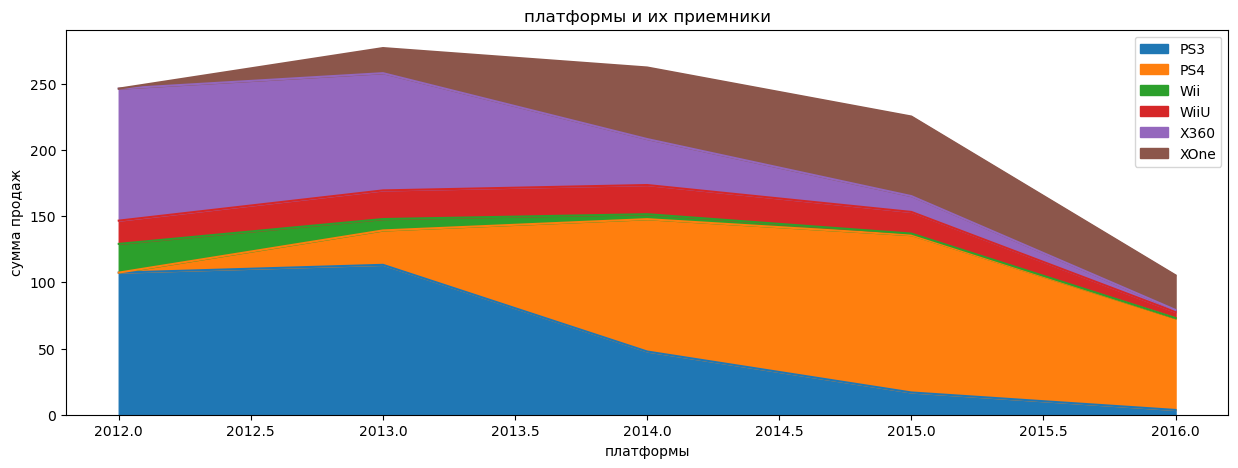

In [52]:
copy_p = ['PS4', 'PS3', 'XOne', 'X360', 'WiiU', 'Wii']
(
    df2_actual.query('platform == @copy_p')
    .pivot_table(index = 'year_of_release',  columns = 'platform', values = 'sales_sum', aggfunc = 'sum')
    .plot.area(title='платформы и их приемники', figsize = (15,5), xlabel='платформы', ylabel='сумма продаж')
    .legend(bbox_to_anchor=(1, 1))
)
plt.show()

По графику можем наблюдать 2015 года значительное сокращение объемов продаж у платформ предшественников - PS3, X360 и Wii.    
В итоге можно выделить в топе следующие платформы PS4, XOne, 3DS, WiiU, PC.

'Коэффициенты корреляции:'

critic_score    0.40
user_score     -0.04
sales_sum       1.00
Name: sales_sum, dtype: float64

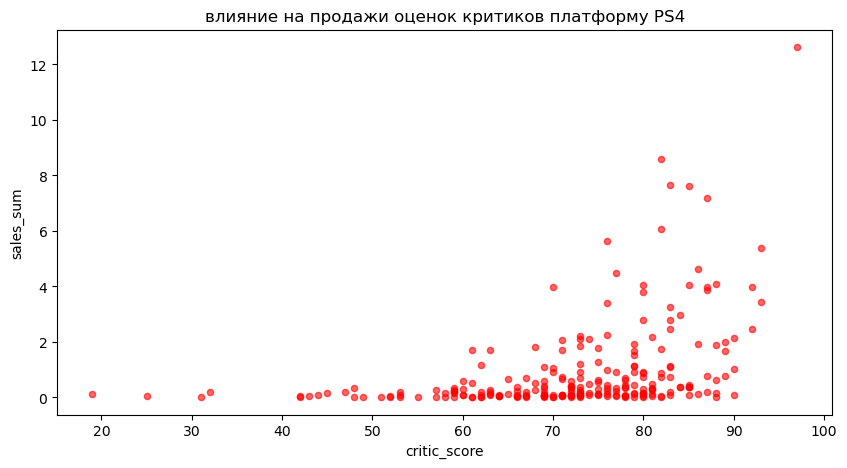

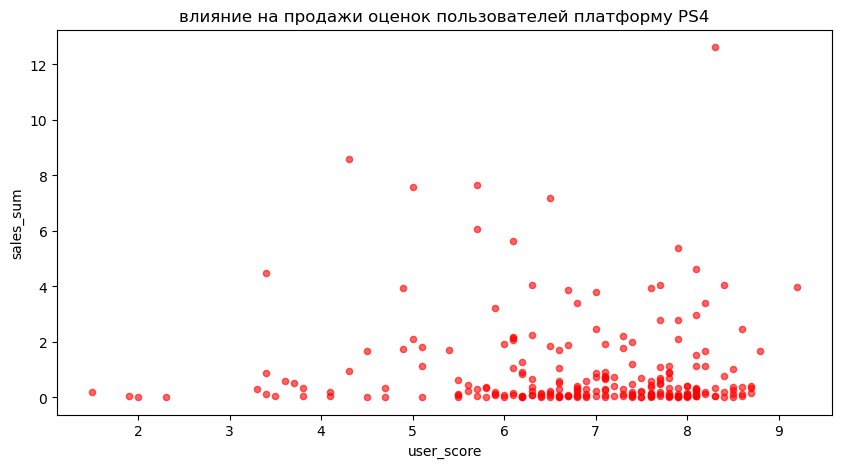

In [53]:
# посмотрим как влияют на продажи внутри популярной платформы PS4 оценки критиков
df2_actual2.query('platform == "PS4" and critic_score != -1 and user_score != -1') \
    .plot(kind='scatter', x='critic_score', y='sales_sum', title='влияние на продажи оценок критиков платформу PS4' \
         , alpha=0.6, figsize=(10,5), c = 'r');

# посмотрим как влияют на продажи внутри популярной платформы PS4 оценки пользователей
df2_actual2.query('platform == "PS4" and critic_score != -1 and user_score != -1') \
.plot(kind='scatter', x='user_score', y='sales_sum', title='влияние на продажи оценок пользователей платформу PS4' \
     , alpha=0.6, figsize=(10,5), c = 'r');

# посмотрим коэффициенты корреляции оценки  пользователей и критиков и продаж
display('Коэффициенты корреляции:', df2_actual2.query('platform == "PS4" and critic_score != -1 and user_score != -1') \
[['critic_score', 'user_score', 'sales_sum']].corr()['sales_sum'].round(2))

Проанализировав платформу PS4 мы выявили слабую взаимосвязь между оценками критиков и продажами (коэффициент корреляции 0.4) и очень слабую между оценками пользователей и продажами (коэффициент корреляции 0.04). Но все же оценки критиков влияют на продажи больше, чем оценки пользователей.   
Наглядно мы можем это видеть на диаграмме рассеяния.

In [54]:
# напишем функцию, чтобы посмотреть влияние на продажи отзывов пользователей и критиков и их взаимосвязь для платформ топ 5
# топ 5 платформ ['PS4', 'XOne', '3DS', 'WiiU', 'PC']
def platform_score(x):
    platform = df2_actual2.loc[(df2_actual2['platform'] == x) & (df2_actual2['critic_score'] != -1) \
                                      & (df2_actual2['user_score'] != -1)]
    platform.plot(kind='scatter', x='critic_score', y='sales_sum', title='влияние на продажи оценок критиков' \
         , alpha=0.6, figsize=(10,5), c = 'r');
    platform.plot(kind='scatter', x='user_score', y='sales_sum', title='влияние на продажи оценок пользователей' \
          , alpha=0.6, figsize=(10,5), c = 'r');
    display('Коэффициенты корреляции:', platform[['critic_score', 'user_score', 'sales_sum']].corr()['sales_sum'].round(2))

'Коэффициенты корреляции:'

critic_score    0.42
user_score     -0.09
sales_sum       1.00
Name: sales_sum, dtype: float64

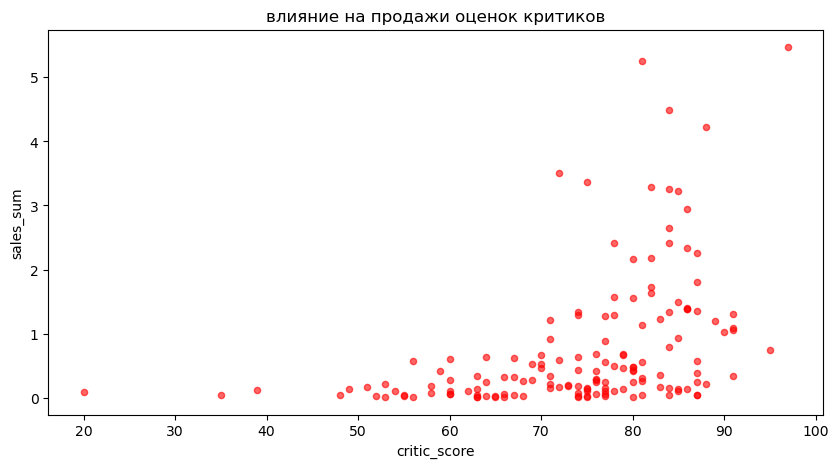

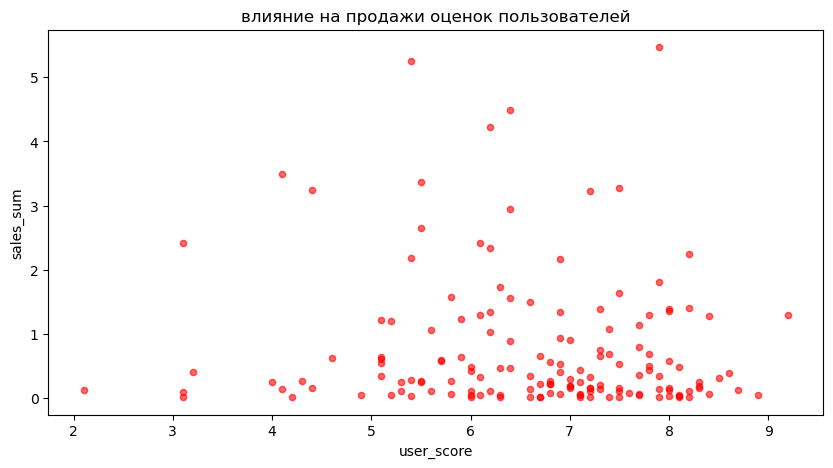

In [55]:
# рассмотрим платформу XOne
platform_score('XOne')

Проанализировав платформу XOne мы выявили слабую взаимосвязь между оценками критиков и продажами (коэффициент корреляции 0.42) и очень слабую между оценками пользователей и продажами (коэффициент корреляции 0.09). Но все же оценки критиков влияют на продажи больше, чем оценки пользователей.   
Наглядно мы можем это видеть на диаграмме рассеяния.

'Коэффициенты корреляции:'

critic_score    0.28
user_score      0.28
sales_sum       1.00
Name: sales_sum, dtype: float64

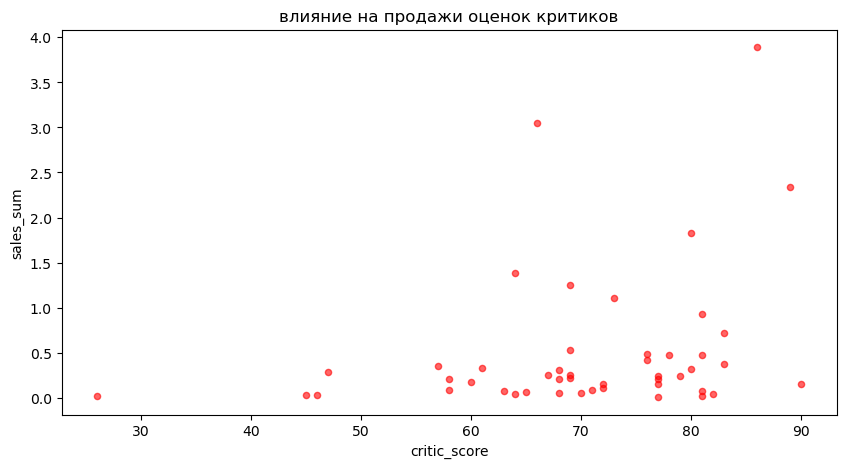

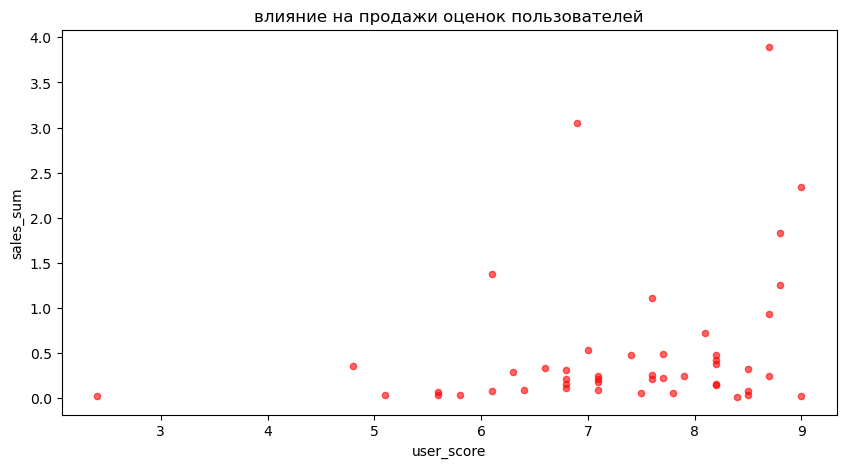

In [56]:
# рассмотрим платформу 3DS
platform_score('3DS')

Проанализировав платформу 3DS мы выявили одинаково очень слабую взаимосвязь между оценками критиков и продажами (коэффициент корреляции 0.28) и  между оценками пользователей и продажами (коэффициент корреляции 0.28).     
Наглядно мы можем это видеть на диаграмме рассеяния.

'Коэффициенты корреляции:'

critic_score    0.38
user_score      0.41
sales_sum       1.00
Name: sales_sum, dtype: float64

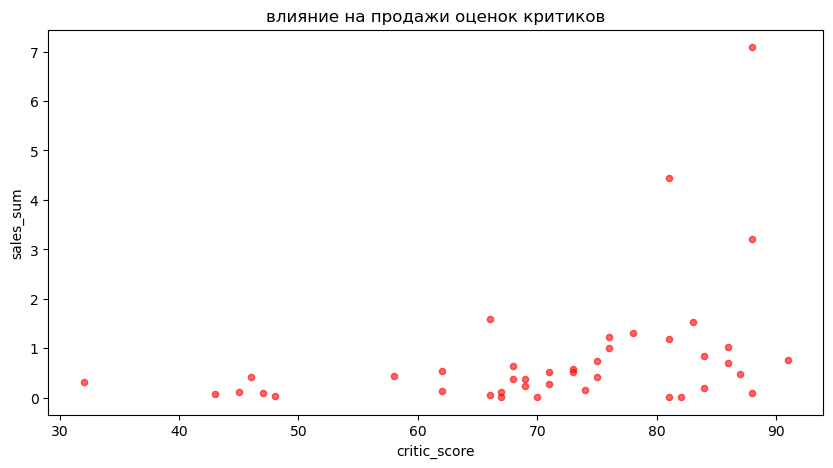

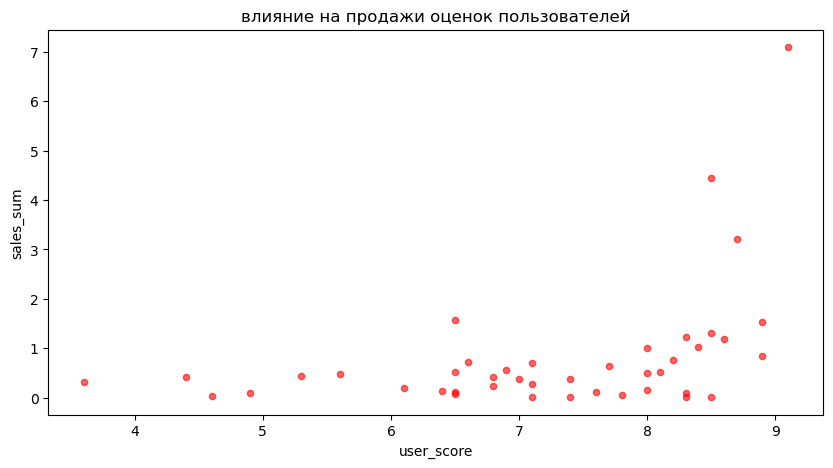

In [57]:
# рассмотрим платформу WiiU
platform_score('WiiU')

Проанализировав платформу WiiU мы выявили слабую взаимосвязь между оценками критиков и продажами (коэффициент корреляции 0.38) и чуть отличающуюся слабую между оценками пользователей и продажами (коэффициент корреляции 0.41). На данной платформе оценки пользователей оказывают чуть большее влияние, чем оценки критиков.   
Наглядно мы можем это видеть на диаграмме рассеяния.

'Коэффициенты корреляции:'

critic_score    0.17
user_score     -0.09
sales_sum       1.00
Name: sales_sum, dtype: float64

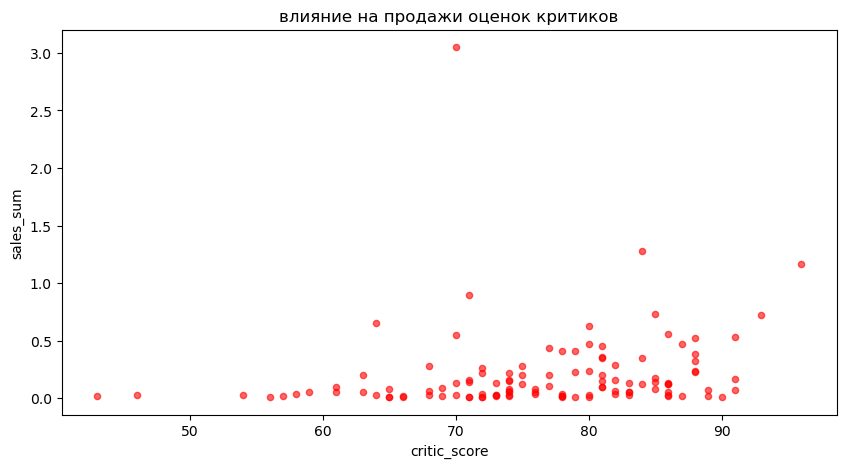

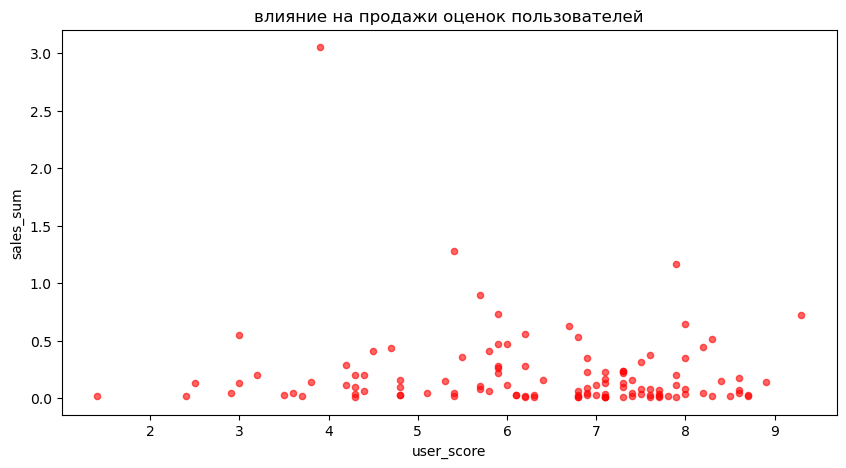

In [58]:
# рассмотрим платформу PC
platform_score('PC')

Проанализировав платформу PC мы выявили очень слабую взаимосвязь между оценками критиков и продажами (коэффициент корреляции 0.17) и чуть отличающуюся очень слабую между оценками пользователей и продажами (коэффициент корреляции 0.09). Но оценки критиков оказывают чуть большее влияние, чем оценки пользователей.   
Наглядно мы можем это видеть на диаграмме рассеяния.

Из проведенного исследования мы выяснили, что взаимосвязь между оценками пользователей и критиков и продажами слабая, либо очень слабая.        
На платформах PS4,  XOne, WiiU взаимосвязь между оценками критиков и продажами слабая, а на платформах 3DS, PC очень слабая.
На платформах WiiU взаимосвязь между оценками пользователей и продажами слабая, а на платформах PS4,  XOne, 3DS, PC очень слабая.

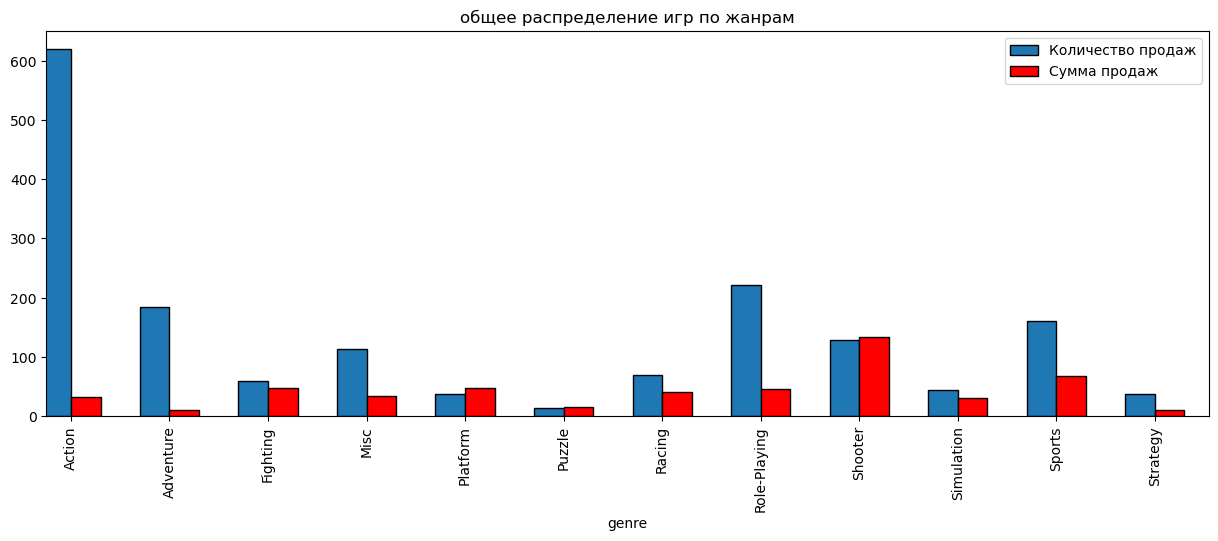

In [59]:
# посмотрим на общее распределение игр по жанрам 
ax = plt.gca()

df2_actual2.pivot_table(index = 'genre',  values = 'name', aggfunc = 'count') \
.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.3, position=1)

genre_pivot = df2_actual2.pivot_table(index = 'genre',  values = 'sales_sum', aggfunc = 'mean')*100
genre_pivot.plot(title='общее распределение игр по жанрам', kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.3, color='r', position=0)

ax.legend(['Количество продаж', 'Сумма продаж'])
plt.show()

In [60]:
df2_actual2.genre.unique()

array(['Shooter', 'Action', 'Role-Playing', 'Sports', 'Fighting',
       'Racing', 'Misc', 'Platform', 'Simulation', 'Adventure', 'Puzzle',
       'Strategy'], dtype=object)

Можно сказать, что самый прибыльный жанр Shooter, у данного жанра в среднем больше всего сумма продаж и количество проданных игр соотносится с их ценой. На втором месте по сумме средних продаж жанр Sports. У жанра Action большое количество проданных игр, но средняя стоимость одной игры очень низкая, похожая ситуация у Adventure и Role-Playing.

In [61]:
# выведем топ 5 жанров 
genre_top = df2_actual2.groupby('genre')['sales_sum'].count().sort_values(ascending = False).head(5)
genre_top

genre
Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Name: sales_sum, dtype: int64

### Портрет пользователя каждого региона

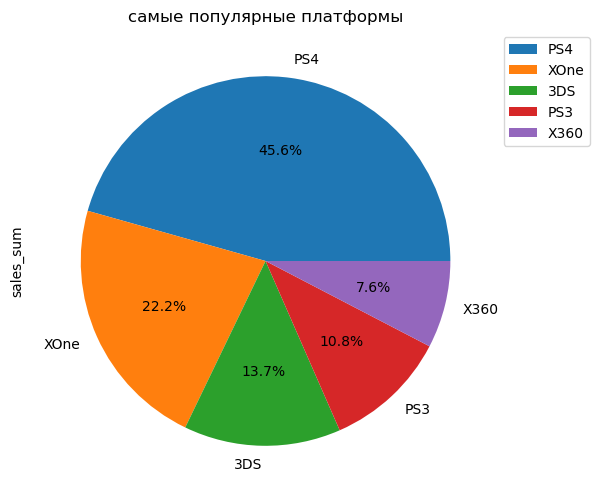

In [62]:
# определим самые популярные платформы во всех регионах
na_sales_platform = df2_actual2.groupby('platform')['sales_sum'].sum().sort_values(ascending = False).head(5)

na_sales_platform.plot(kind='pie', figsize = (6,6), autopct='%1.1f%%', title='самые популярные платформы',) \
.legend(bbox_to_anchor=(1, 1))
plt.show()

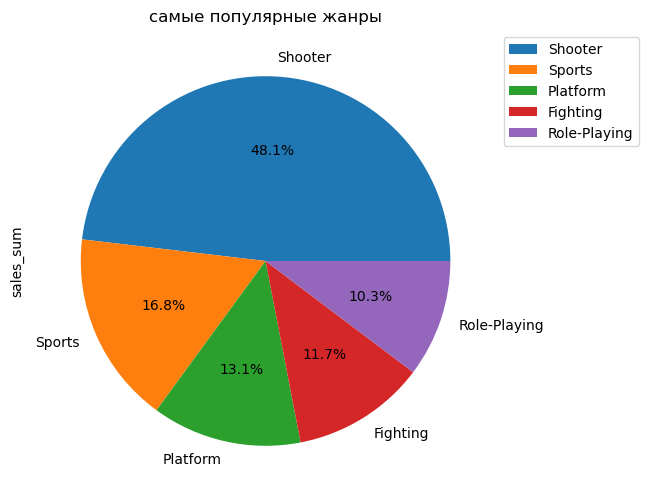

In [63]:
# определим самые популярные жанры во всех регионах
# рассчитаем медиану, тк ранее мы видели на графике, что есть жанры как Action с дешевыми играми, но большим кол-вом продаж
na_sales_genre = df2_actual2.groupby('genre')['sales_sum'].median().sort_values(ascending = False).head(5)*100

na_sales_genre.plot(kind='pie', figsize = (6,6), autopct='%1.1f%%', title='самые популярные жанры',) \
.legend(bbox_to_anchor=(1, 1))
plt.show()

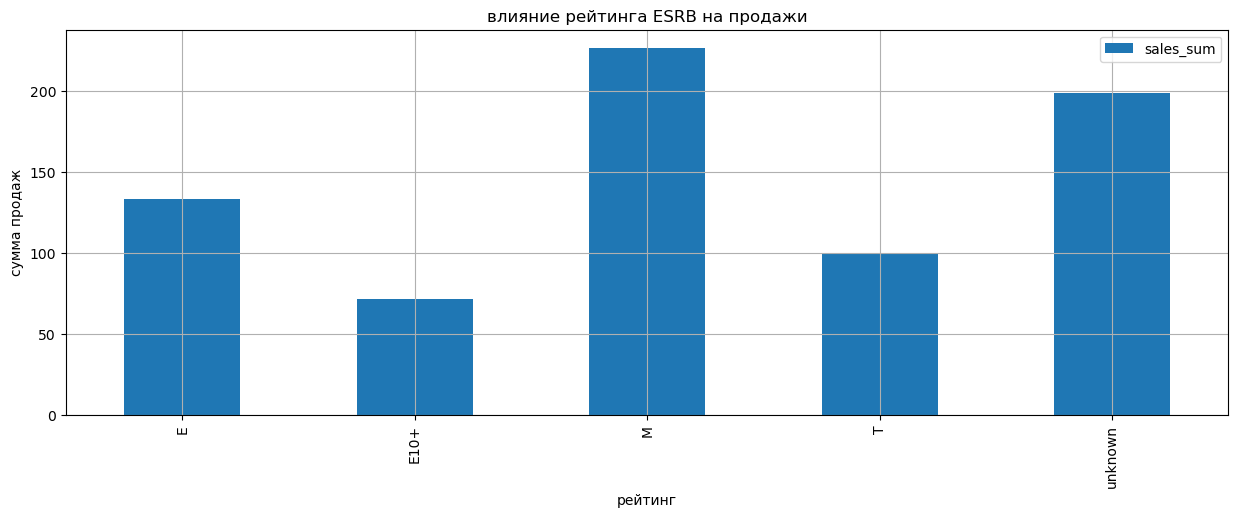

In [64]:
# посмотрим как влияет рейтинг ESRB на продажи во всех регионах
df2_actual2.pivot_table(index = 'rating',  values = 'sales_sum', aggfunc = 'sum').reset_index() \
.plot(x='rating', y='sales_sum', kind='bar', title='влияние рейтинга ESRB на продажи', figsize = (15,5), \
      grid=True, xlabel='рейтинг', ylabel='сумма продаж')
plt.show()

#### Портрет пользователя в Северной Америке

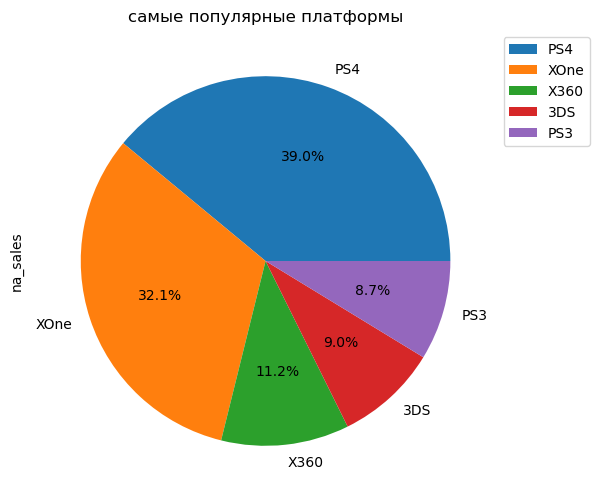

In [65]:
# определим самые популярные платформы
na_sales_platform = df2_actual2.groupby('platform')['na_sales'].sum().sort_values(ascending = False).head(5)

na_sales_platform.plot(kind='pie', figsize = (6,6), autopct='%1.1f%%', title='самые популярные платформы',) \
.legend(bbox_to_anchor=(1, 1))
plt.show()

Самые популярные платформы в Северной Америке практически не отличаются от общего рейтинга. Подавляющее большинство использует платформы PS4 и XOne.

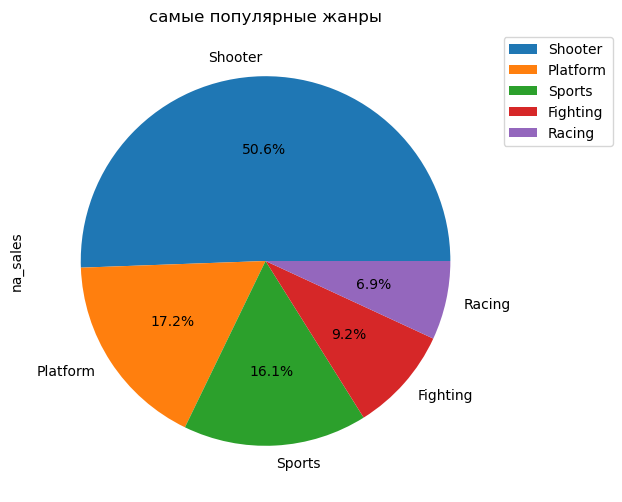

In [66]:
# определим самые популярные жанры 
na_sales_genre = df2_actual2.groupby('genre')['na_sales'].median().sort_values(ascending = False).head(5)*100

na_sales_genre.plot(kind='pie', figsize = (6,6), autopct='%1.1f%%', title='самые популярные жанры') \
.legend(bbox_to_anchor=(1, 1))
plt.show()

В рейтинге популярных жанров в Северной Америке 50% занимает Shooter, Platform и Sports занимают 2 и 3 места. Fighting и Racing замыкают топ. С общим рейтингом пользователи Северной Америки сходятся только в жанрах Shooter, Sports и Platform. Shooter также как в общем рейтинге занимает подавляющее большинство. 

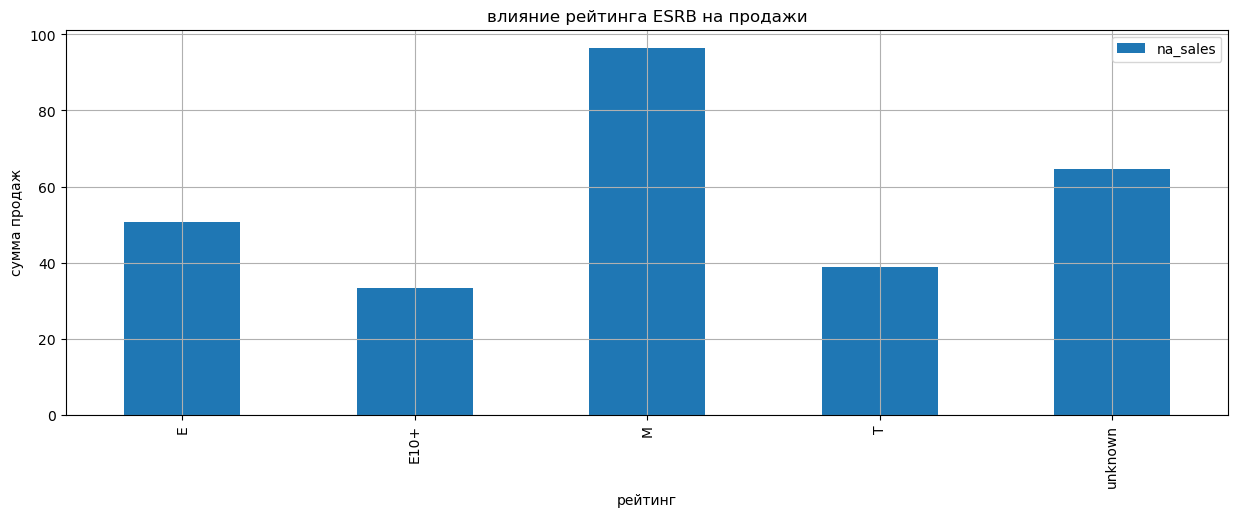

In [67]:
# посмотрим как влияет рейтинг ESRB на продажи
df2_actual2.pivot_table(index = 'rating',  values = 'na_sales', aggfunc = 'sum').reset_index() \
.plot(x='rating', y='na_sales', kind='bar', title='влияние рейтинга ESRB на продажи', figsize = (15,5), \
      grid=True, xlabel='рейтинг', ylabel='сумма продаж')
plt.show()

Самые популярные игры с рейтингом М (17+ лет). Остальные игры с рейтингом для лиц младшего возраста (кроме неизвестных нам) гораздо менее популярны.

In [68]:
display(df2_actual2.na_sales.sum().round(2))
display(df2_actual2.eu_sales.sum().round(2))
display(df2_actual2.jp_sales.sum().round(2))

284.06

270.68

93.09

#### Портрет пользователя в Европе

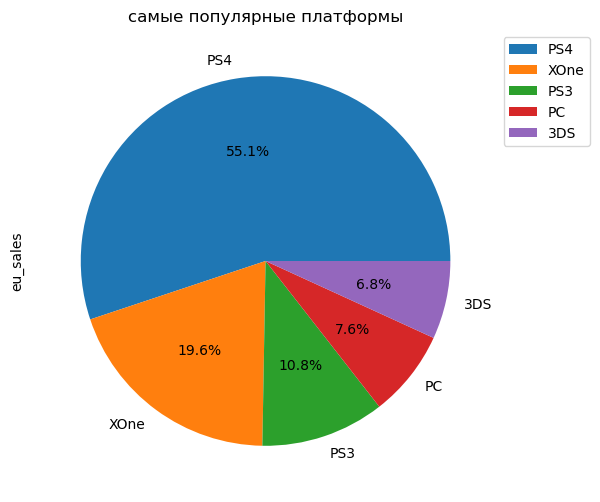

In [69]:
# определим самые популярные платформы
na_sales_platform = df2_actual2.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).head(5)

na_sales_platform.plot(kind='pie', figsize = (6,6), autopct='%1.1f%%', title='самые популярные платформы',) \
.legend(bbox_to_anchor=(1, 1))
plt.show()

Подавляющее большинство в Европе использует платформу PS4. XOne идет на 2 месте. Вместо X360 в топ 5 вошла платформа РС.

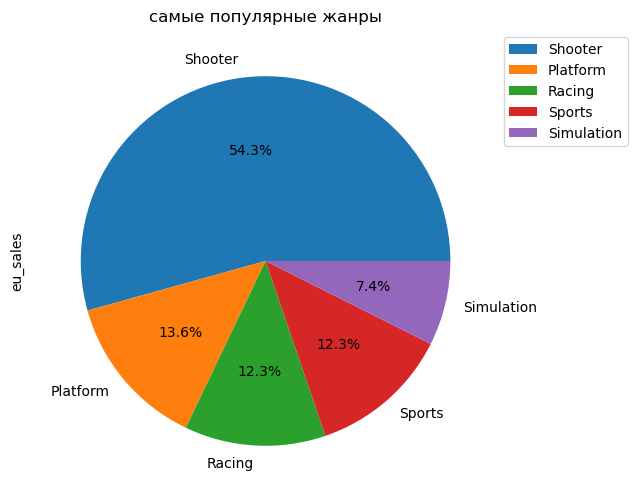

In [70]:
# определим самые популярные жанры  
na_sales_genre = df2_actual2.groupby('genre')['eu_sales'].median().sort_values(ascending = False).head(5)*100

na_sales_genre.plot(kind='pie', figsize = (6,6), autopct='%1.1f%%', title='самые популярные жанры',) \
.legend(bbox_to_anchor=(1, 1))
plt.show()

Лидеры самых популярных платфом в Европе практически не отличаются от рейтинга жителей  в Северной Америке. Только в Европе после жанров Shooter и Platform отдают большее предпочтение жанру Racing, затем идет Sports. Также замыкает топ жанр Simulation.

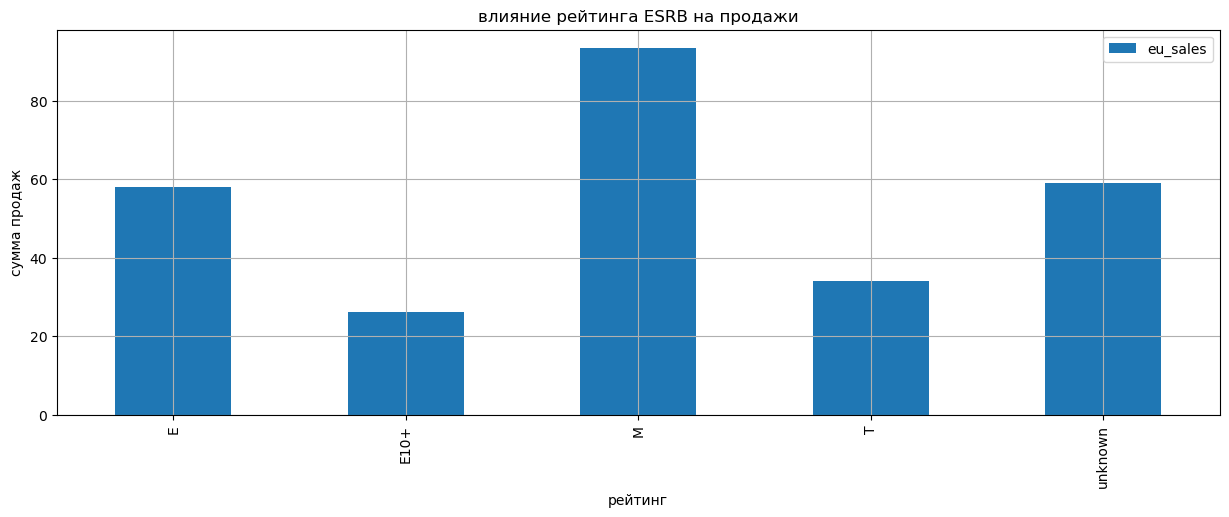

In [71]:
# посмотрим как влияет рейтинг ESRB на продажи
df2_actual2.pivot_table(index = 'rating',  values = 'eu_sales', aggfunc = 'sum').reset_index() \
.plot(x='rating', y='eu_sales', kind='bar', title='влияние рейтинга ESRB на продажи', figsize = (15,5), \
      grid=True, xlabel='рейтинг', ylabel='сумма продаж')
plt.show()

Самые популярные игры с рейтингом М (17+ лет). Второе место разделяют игры с рейтингами Е (для всех) и неизвестные нам.
Игры с рейтингом Е10+ (10 и более лет) и игры с рейтингом Т (для подростков) гораздо менее популярны.

#### Портрет пользователя в Японии

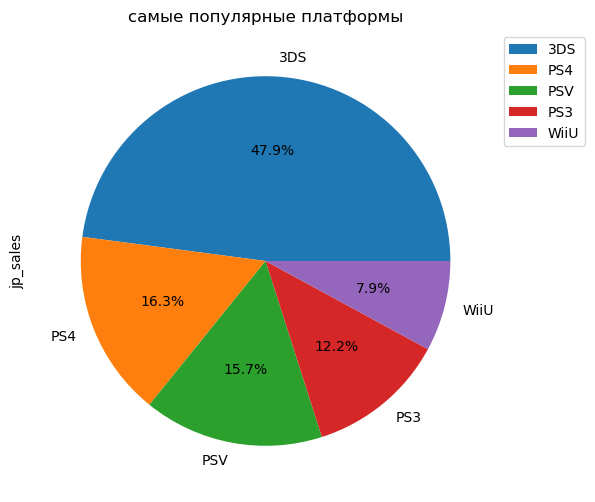

In [72]:
# определим самые популярные платформы
na_sales_platform = df2_actual2.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).head(5)

na_sales_platform.plot(kind='pie', figsize = (6,6), autopct='%1.1f%%', title='самые популярные платформы',) \
.legend(bbox_to_anchor=(1, 1))
plt.show()

Самые популярные платформы в Японии отличаются от общего рейтинга. Лидирующее место занимает игровая платформа 3DS. Это связано с тем, что игровая платформа 3DS производится в Японии и является очень популярной у местных жителей. Далее в рейтинге идут PS4 и  XOne занимая вместе около 30% рынка. Менее популярна прошлая версия PS4 - PS3. Замыкает топ 5 платформ WiiU.

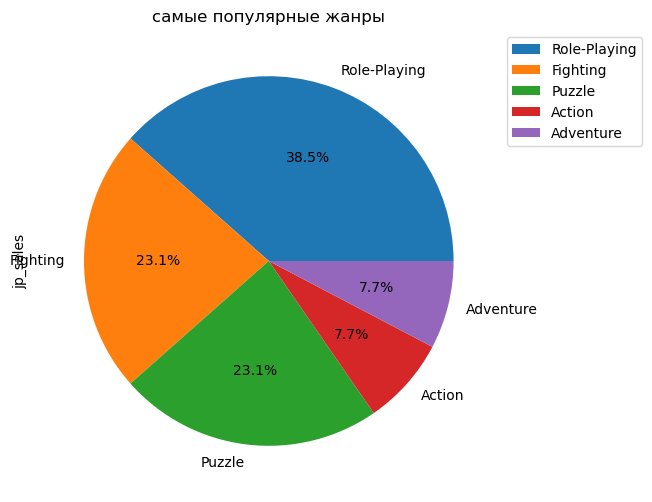

In [73]:
# определим самые популярные жанры
na_sales_genre = df2_actual2.groupby('genre')['jp_sales'].median().sort_values(ascending = False).head(5)*100

na_sales_genre.plot(kind='pie', figsize = (6,6), autopct='%1.1f%%', title='самые популярные жанры',) \
.legend(bbox_to_anchor=(1, 1))
plt.show()

Если в Европе и Северной Америке большинство рынка занимали жанры Shooter и Platform, то в Японии они не входят в топ 5. На первом месте находится Role-Playing и немного от него отстают Fighting и Puzzle. Замыкают топ Action и Adventure.

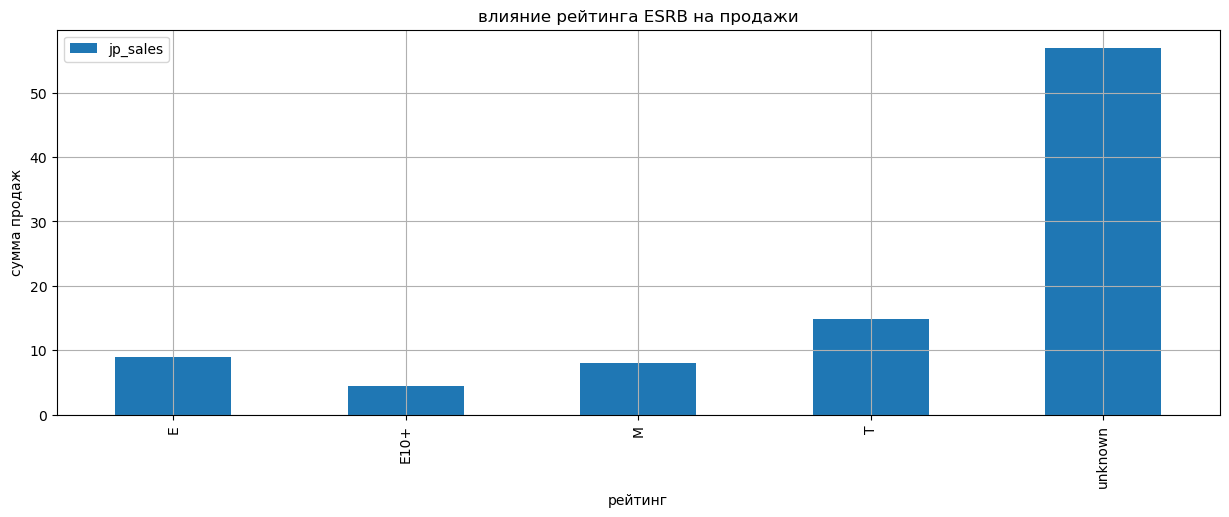

In [74]:
# посмотрим как влияет рейтинг ESRB на продажи
df2_actual2.pivot_table(index = 'rating',  values = 'jp_sales', aggfunc = 'sum').reset_index() \
.plot(x='rating', y='jp_sales', kind='bar', title='влияние рейтинга ESRB на продажи', figsize = (15,5), \
      grid=True, xlabel='рейтинг', ylabel='сумма продаж')
plt.show()

Самые популярные игры с рейтингом М (17+ лет). Остальные игры с рейтингом для лиц младшего возраста (кроме неизвестных нам) гораздо менее популярны. Т (для подростков)
Видно, что большинство игр в Японии пользуется популярностью с неизвестным нам рейтингом. Возможно, это связано с тем, что большинство используют японскую платформу 3DS, а ассоциация ESRB направлена на определение рейтинга в Канаде и США. Из остальных самым популярным рейтингом является Т (для подростков)

**Общий вывод:**    
В Европе и Северной Америке у покупателей схожи предпочтения в выборе игровой платформы и игрового жанра. В основном они используют платформы  PS4 и XOne, а основную долю рынка занимают жанры Shooter и Platform.    
Япония сильно отличается от других регионов. Покупатели в Японии отдают предпочтение японской игровой платформе 3DS и больше предпочитают игровые жанры Role-Playing и Fighting.    
Рейтинг ESRВ больше влияет на продажи в Европе и Северной Америке, тк в Японии большинство используют японскую игровую платформу.

### Проверка гипотез

**Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

H_0: Средний рейтинг пользователей (user_score) платформы 'XOne' = средний рейтинг пользователей (user_score) платформы 'PC'    
H_a: Средний рейтинг пользователей (user_score) платформы 'XOne' ≠ средний рейтинг пользователей (user_score) платформы 'PC'   


критический уровень статистической значимости alpha = 0.05

In [75]:
# определим переменные
x_one = df2_actual2[(df2_actual2['platform'] == 'XOne') & (df2_actual2['user_score'] != -1)]
pc = df2_actual2[(df2_actual2['platform'] == 'PC') & (df2_actual2['user_score'] != -1)]

# вызовем метод results для проверки гипотезы
results = st.ttest_ind(x_one['user_score'],pc['user_score'], equal_var=False)
alpha = .05
# выведем значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза не отвергнута - средние пользовательские рейтинги платформ Xbox One и PC одинаковые, т.е. нет статистически значимых различий между средними двух выборок пользовательских рейтингов платформ Xbox One и PC.

**Проверка гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные.**


H_0: Средний рейтинг пользователей (user_score) жанра 'Action' = средний рейтинг пользователей (user_score) жанра 'Sports'    
H_a: Средний рейтинг пользователей (user_score) жанра 'Action' ≠ средний рейтинг пользователей (user_score) жанра 'Sports'    

критический уровень статистической значимости alpha = 0.05

In [76]:
# определим переменные
action = df2_actual2[(df2_actual2['genre'] == 'Action') & (df2_actual2['user_score'] != -1)]
sports = df2_actual2[(df2_actual2['genre'] == 'Sports') & (df2_actual2['user_score'] != -1)]

# вызовем метод results для проверки гипотезы
results = st.ttest_ind(action['user_score'],sports['user_score'], equal_var=False)
alpha = .05
# выведем значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.1825550382644557e-14
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута - средние пользовательские рейтинги жанров Action и Sports разные, т.е. присутствуют статистически значимые различия между средними двух выборок пользовательских рейтингов жанров Action и Sports.

### Общий вывод

Были исследованы исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы за несколько лет.    

В ходе предобработки имеющихся данных:
- откорректированы данные в разрезе заполнения пропущенных значений, где это было возможно; 
- изменены типы данных, где это было необходимо;
- посчитаны и добавлены в таблицу суммарные продажи игр во всех регионах.

Во время исследовательского анализа данных было выяснено:    

- до 1994 года игр практически не было, затем индустрия развивалась и резкий скачок в продажах произошел в 2002 году. Пик был в 2008 и 2009 годах. После чего количество выпускаемых игр начинает снижаться и остается на одном уровне с 2012 года. Это можно объяснить развитием игр на мобильных устройствах и игровых приставках;
- лидирующие платформы по продажам за весь период - PS2, X360, PS, Wii, DS, PS;
- в среднем платформы существуют около 7 лет. Популярность платформ постоянно меняется, какие-то платформы уходят с рынка, появляются новые, некоторые выпускают новые версии;
- период исследования был взят за 2014-2016, тк актуальные платформы по объему продаж сформировались с 2014 года, а в 2016 году самые актуальные данные;
- самая прибыльная платформа PS4, XOne на втором месте, данные платформы постепенно наращивают продажи. PS4 опережает XOne за счет аномально больших редких продаж, что может быть связано с дороговизной или популярностью конкретных игр на платформе. PS3 и X360 отстают от своих новых версий PS4 и XOne и в дальнейшем отставание будет только расти, тк когда выходит новая версия платформы, на старой можно играть в новые игры еще 1.5 года, затем новые игры для старых версий становятся недоступны и многие переходят на новую платформу. Платформа 3DS имеет неплохой % продаж относительно остальных платформ, но с годами объем падает, ее основные продажи гораздо меньше ближайших конкурентов, но есть несколько дорогостоящих или популярных игр. Платформа WiiU относительно стабильна в объемах продаж. WiiU немного отстает от своей предшественницы Wii, но на платформе появились более дорогие игры. PC занимает небольшую долю рынка относительно лидеров, но не сильно теряет в объеме продаж со временем;
- перспективные платформы PS4, XOne, 3DS, WiiU, PC;
- взаимосвязь между оценками пользователей и критиков и продажами слабая, либо очень слабая. На платформах PS4,  XOne, WiiU взаимосвязь между оценками критиков и продажами слабая, а на платформах 3DS, PC очень слабая. На платформах WiiU взаимосвязь между оценками пользователей и продажами слабая, а на платформах PS4,  XOne, 3DS, PC очень слабая;
- если смотреть в среднем по всем регионам - самый прибыльный жанр Shooter, у данного жанра в среднем больше всего сумма продаж и количество проданных игр соотносится с их ценой. На втором месте по сумме средних продаж жанр Sports. У жанра Action большое количество проданных игр, но средняя стоимость одной игры очень низкая, похожая ситуация у Adventure и Role-Playing.    

Составлены портреты пользователей каждого региона:    

- В Европе и Северной Америке у покупателей схожи предпочтения в выборе игровой платформы и игрового жанра. В основном они используют платформы PS4 и XOne, а основную долю рынка занимают жанры Shooter и Platform;
- Япония сильно отличается от других регионов. Покупатели в Японии отдают предпочтение японской игровой платформе 3DS и больше предпочитают игровые жанры Role-Playing и Fighting;
- рейтинг ESRВ больше влияет на продажи в Европе и Северной Америке, тк в Японии большинство используют японскую игровую платформу 3DS.    

Проверили гипотезы:    

- средние пользовательские рейтинги платформ Xbox One и PC одинаковые, т.е. нет статистически значимых различий между средними двух выборок пользовательских рейтингов платформ Xbox One и PC;
- средние пользовательские рейтинги жанров Action и Sports разные, т.е. присутствуют статистически значимые различия между средними двух выборок пользовательских рейтингов жанров Action и Sports.

Полученные выводы позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.